## O problemu

**Dataset**: https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction

**Atributi dataset-a**: <br>
    CustomerID - Jedinstveni ID korisnika <br>
    Churn - Prekid korišćenja usluge kompanije <br>
    Tenure - Staž korisnika u kompaniji <br>
    PreferredLoginDevice - Odabrani uređaj za prijavu korisnika <br>
    CityTier - Nivo grada <br>
    WarehouseToHome - Udaljenost između skladišta i kuće korisnika <br>
    PreferredPaymentMode - Odabrani način plaćanja korisnika <br>
    Gender - Pol korisnika <br>
    HourSpendOnApp - Broj sati provedenih na mobilnoj aplikaciji ili veb stranici kompanije <br>
    NumberOfDeviceRegistered - Ukupan broj uređaja registrovan na određenog korisnika <br>
    PreferedOrderCat - Odabrana kategorija narudžbine korisnika u poslednjem mesecu <br>
    SatisfactionScore - Ocena zadovoljstva korisnika uslugom <br>
    MaritalStatus - Bračni status korisnika <br>
    NumberOfAddress - Ukupan broj dodatih adresa određenog korisnika <br>
    Complain - Da li je podneta žalba u poslednjem mesecu <br>
    OrderAmountHikeFromlastYear - Postotno povećanje porudžbine u odnosu na prošlu godinu <br>
    CouponUsed - Ukupan broj korišćenih kupona u poslednjem mesecu <br>
    OrderCount - Ukupan broj porudžbina koje su postavljene u poslednjem mesecu <br>
    DaySinceLastOrder - Dani od poslednje porudžbine korisnika <br>
    CashbackAmount - Prosečan povraćaj novca u poslednjem mesecu <br>

## Priprema i preobrada podataka

### Importovanje biblioteka

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')

### Ucitavanje podataka

In [3]:
df = pd.read_excel('E Commerce Dataset.xlsx', sheet_name='E Comm')
print("Data Shape:",df.shape) 
df.head(10) 

Data Shape: (5630, 20)


CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   
5       50006      1     0.0             Computer         1             22.0   
6       50007      1     NaN                Phone         3             11.0   
7       50008      1     NaN                Phone         1              6.0   
8       50009      1    13.0                Phone         3              9.0   
9       50010      1     NaN                Phone         1             31.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   
5           Debit Card  Female             3.0                         5   
6     Cash on Delivery    Male             2.0                         3   
7                   CC    Male             3.0                         3   
8             E wallet    Male             NaN                         4   
9           Debit Card    Male             2.0                         5   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                7   
2              Mobile                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4              Mobile                  5        Single                3   
5        Mobile Phone                  5        Single                2   
6  Laptop & Accessory                  2      Divorced                4   
7              Mobile                  2      Divorced                3   
8              Mobile                  3      Divorced                2   
9              Mobile                  3        Single                2   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   
5         1                         22.0         4.0         6.0   
6         0                         14.0         0.0         1.0   
7         1                         16.0         2.0         2.0   
8         1                         14.0         0.0         1.0   
9         0                         12.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07  
4                3.0          129.60  
5                7.0          139.19  
6                0.0          120.86  
7                0.0          122.93  
8                2.0          126.83  
9                1.0          122.93

### Informacije o podacima

In [4]:
df.describe()

CustomerID        Churn       Tenure     CityTier  WarehouseToHome  \
count   5630.000000  5630.000000  5366.000000  5630.000000      5379.000000   
mean   52815.500000     0.168384    10.189899     1.654707        15.639896   
std     1625.385339     0.374240     8.557241     0.915389         8.531475   
min    50001.000000     0.000000     0.000000     1.000000         5.000000   
25%    51408.250000     0.000000     2.000000     1.000000         9.000000   
50%    52815.500000     0.000000     9.000000     1.000000        14.000000   
75%    54222.750000     0.000000    16.000000     3.000000        20.000000   
max    55630.000000     1.000000    61.000000     3.000000       127.000000   

       HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
count     5375.000000               5630.000000        5630.000000   
mean         2.931535                  3.688988           3.066785   
std          0.721926                  1.023999           1.380194   
min          0.000000                  1.000000           1.000000   
25%          2.000000                  3.000000           2.000000   
50%          3.000000                  4.000000           3.000000   
75%          3.000000                  4.000000           4.000000   
max          5.000000                  6.000000           5.000000   

       NumberOfAddress     Complain  OrderAmountHikeFromlastYear   CouponUsed  \
count      5630.000000  5630.000000                  5365.000000  5374.000000   
mean          4.214032     0.284902                    15.707922     1.751023   
std           2.583586     0.451408                     3.675485     1.894621   
min           1.000000     0.000000                    11.000000     0.000000   
25%           2.000000     0.000000                    13.000000     1.000000   
50%           3.000000     0.000000                    15.000000     1.000000   
75%           6.000000     1.000000                    18.000000     2.000000   
max          22.000000     1.000000                    26.000000    16.000000   

        OrderCount  DaySinceLastOrder  CashbackAmount  
count  5372.000000        5323.000000     5630.000000  
mean      3.008004           4.543491      177.223030  
std       2.939680           3.654433       49.207036  
min       1.000000           0.000000        0.000000  
25%       1.000000           2.000000      145.770000  
50%       2.000000           3.000000      163.280000  
75%       3.000000           7.000000      196.392500  
max      16.000000          46.000000      324.990000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

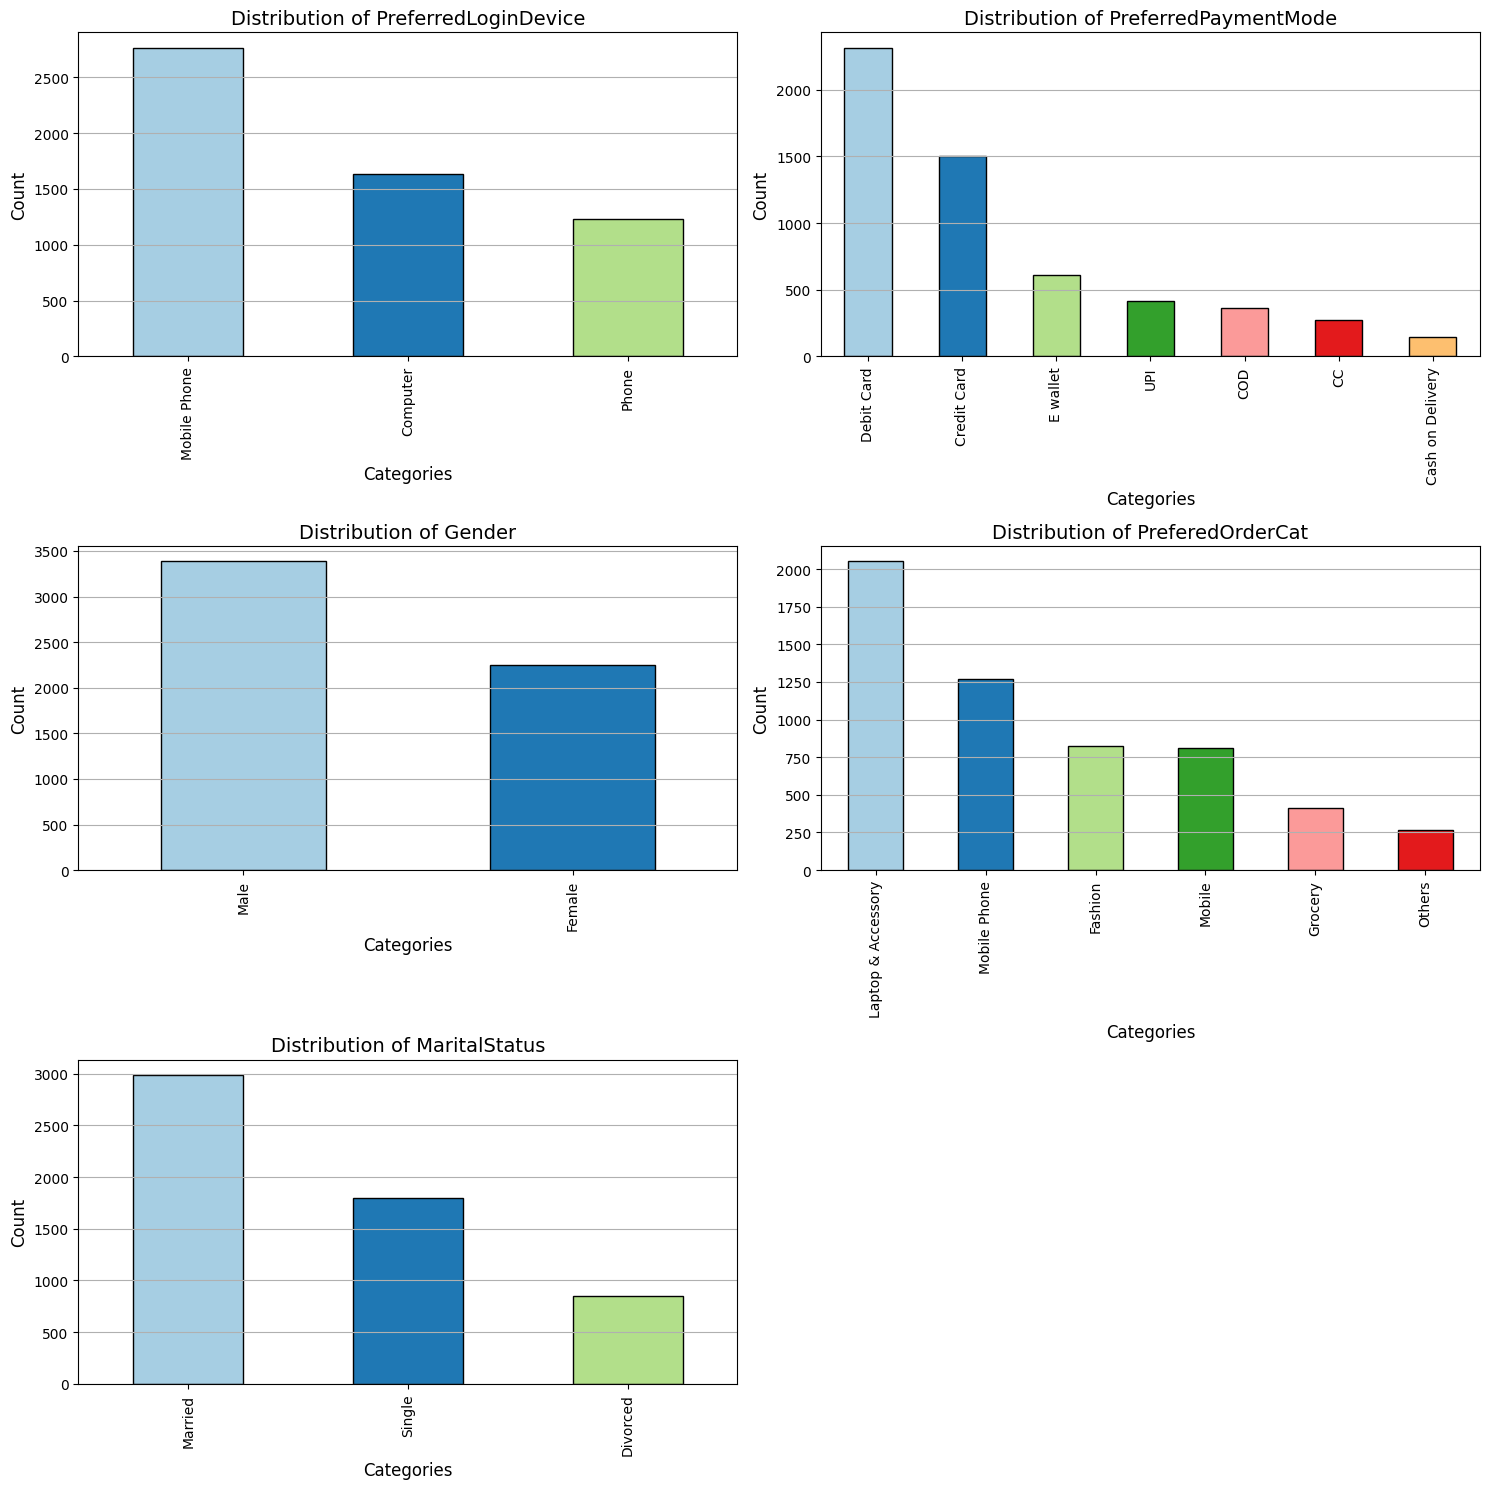

In [6]:
categorical_features = df.select_dtypes(include=['object']).columns
num_plots = len(categorical_features)
num_rows = 3
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

for i, feature in enumerate(categorical_features):
    row, col = divmod(i, num_cols)
    ax = axes[row, col]

    colors = plt.cm.Paired(range(len(df[feature].value_counts())))
    df[feature].value_counts().plot(kind='bar', ax=ax, color=colors, edgecolor='black')

    ax.set_title(f'Distribution of {feature}', fontsize=14)
    ax.set_xlabel('Categories', fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.grid(axis='y')

if num_plots % 2 != 0:
    fig.delaxes(axes.flatten()[-1])

plt.tight_layout()
plt.show()


Primećuje se da fičer PrefferedPaymentMode ima duplirane vrednosti (par vrednosti CC i CreditCard, kao i par COD i Cash On Delivery). Stoga je potrebno svaki par objediniti u jedinstvenu vrednost.

In [7]:
df.loc[df['PreferredPaymentMode'] == 'COD', 'PreferredPaymentMode' ] = 'Cash on Delivery'   
df.loc[df['PreferredPaymentMode'] == 'CC', 'PreferredPaymentMode' ] = 'Credit Card'

In [8]:
df['PreferredPaymentMode'].value_counts()

Debit Card          2314
Credit Card         1774
E wallet             614
Cash on Delivery     514
UPI                  414
Name: PreferredPaymentMode, dtype: int64

In [9]:
# df.loc[df['PreferredLoginDevice'] == 'Phone', 'PreferredLoginDevice' ] = 'Mobile Phone'
# df.loc[df['PreferedOrderCat'] == 'Mobile', 'PreferedOrderCat' ] = 'Mobile Phone'

In [10]:
# df['PreferredLoginDevice'].value_counts()

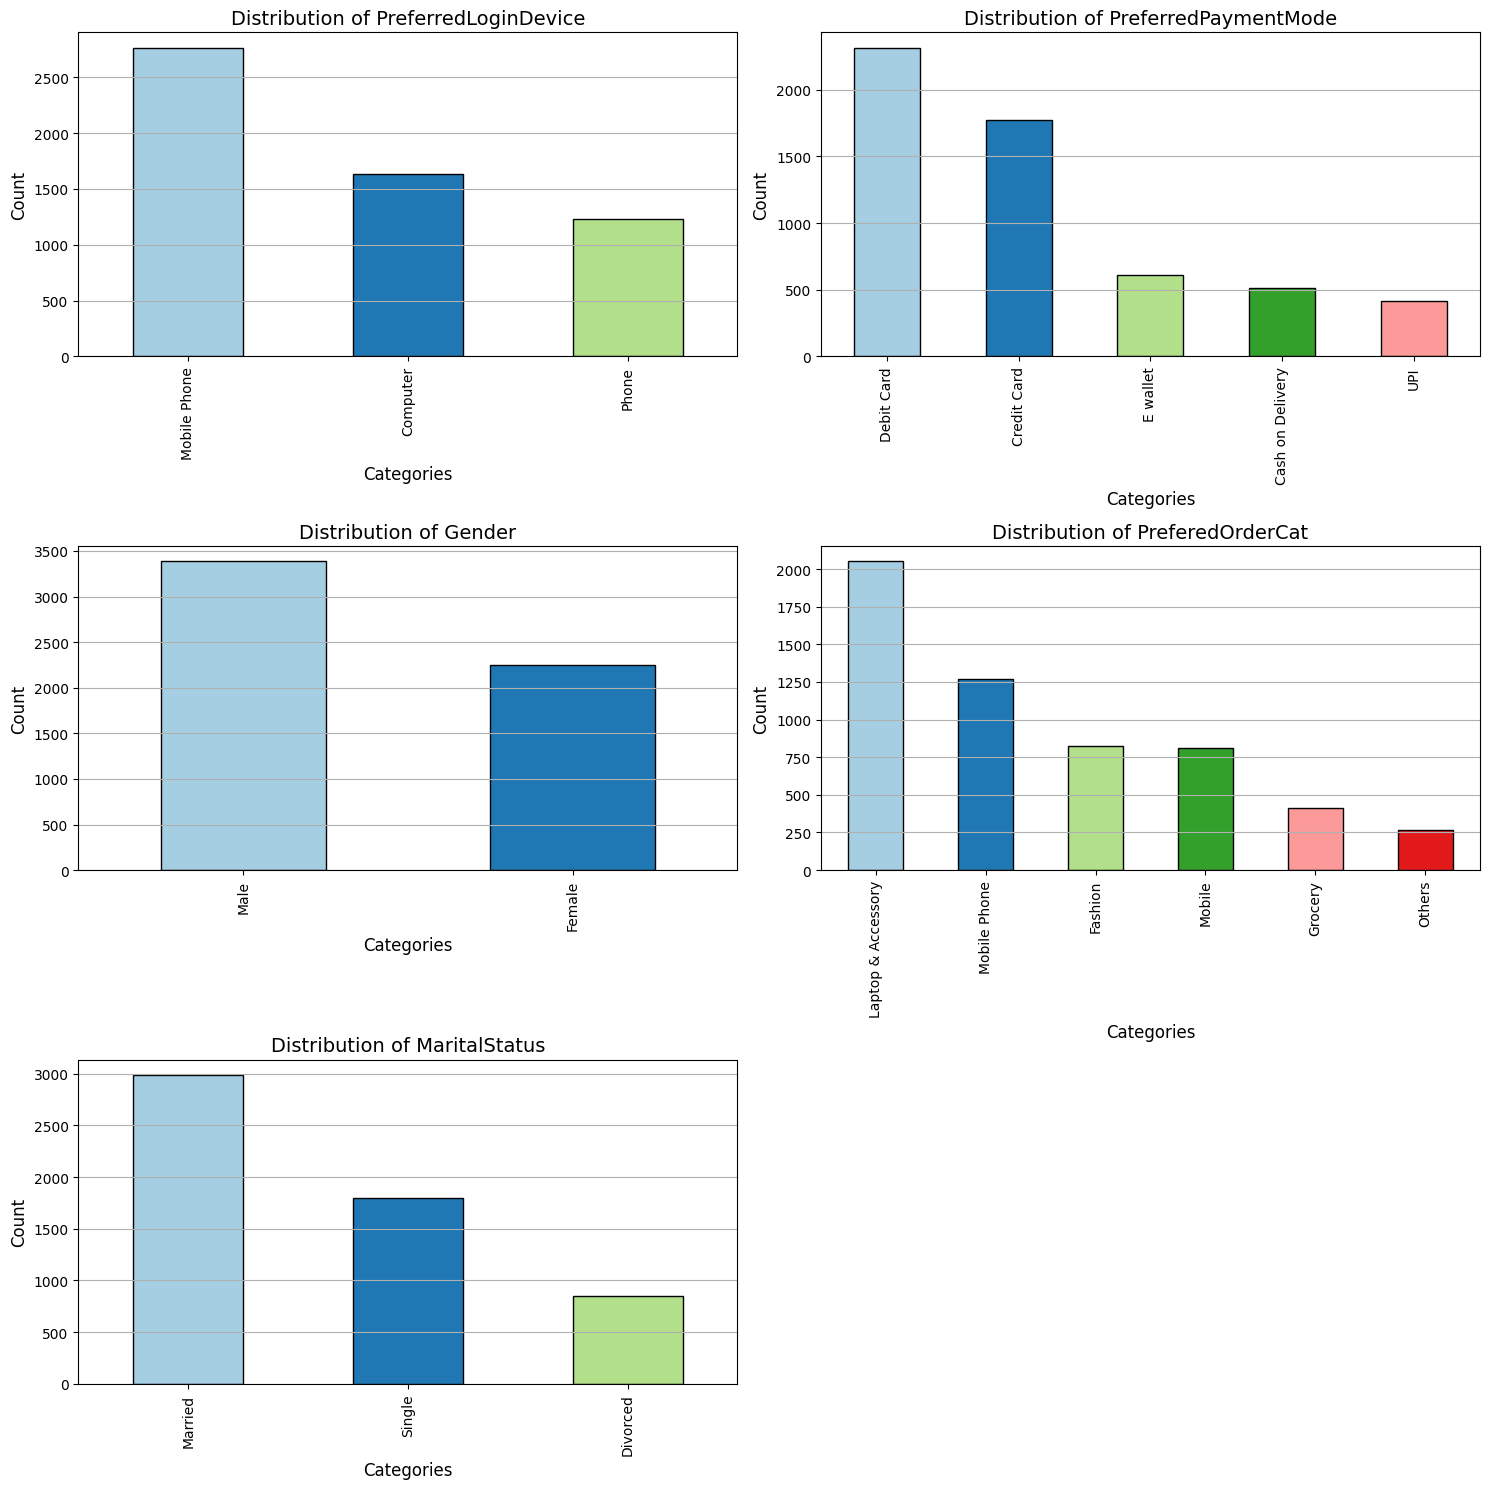

In [11]:
categorical_features = df.select_dtypes(include=['object']).columns
num_plots = len(categorical_features)
num_rows = 3
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

for i, feature in enumerate(categorical_features):
    row, col = divmod(i, num_cols)
    ax = axes[row, col]

    colors = plt.cm.Paired(range(len(df[feature].value_counts())))
    df[feature].value_counts().plot(kind='bar', ax=ax, color=colors, edgecolor='black')

    ax.set_title(f'Distribution of {feature}', fontsize=14)
    ax.set_xlabel('Categories', fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.grid(axis='y')

if num_plots % 2 != 0:
    fig.delaxes(axes.flatten()[-1])

plt.tight_layout()
plt.show()

In [12]:
df.nunique()

CustomerID                     5630
Churn                             2
Tenure                           36
PreferredLoginDevice              3
CityTier                          3
WarehouseToHome                  34
PreferredPaymentMode              5
Gender                            2
HourSpendOnApp                    6
NumberOfDeviceRegistered          6
PreferedOrderCat                  6
SatisfactionScore                 5
MaritalStatus                     3
NumberOfAddress                  15
Complain                          2
OrderAmountHikeFromlastYear      16
CouponUsed                       17
OrderCount                       16
DaySinceLastOrder                22
CashbackAmount                 2586
dtype: int64

### Detekcija duplikata

In [13]:
dupl = df.duplicated()
print('Broj duplikata: %d' % dupl.sum())


Broj duplikata: 0


### Tretman nedostajućih vrednosti

In [14]:
# Procenat nedostajućih vrednosti u svakoj koloni
round((df.isnull().sum()*100 / df.shape[0]),2)

CustomerID                     0.00
Churn                          0.00
Tenure                         4.69
PreferredLoginDevice           0.00
CityTier                       0.00
WarehouseToHome                4.46
PreferredPaymentMode           0.00
Gender                         0.00
HourSpendOnApp                 4.53
NumberOfDeviceRegistered       0.00
PreferedOrderCat               0.00
SatisfactionScore              0.00
MaritalStatus                  0.00
NumberOfAddress                0.00
Complain                       0.00
OrderAmountHikeFromlastYear    4.71
CouponUsed                     4.55
OrderCount                     4.58
DaySinceLastOrder              5.45
CashbackAmount                 0.00
dtype: float64

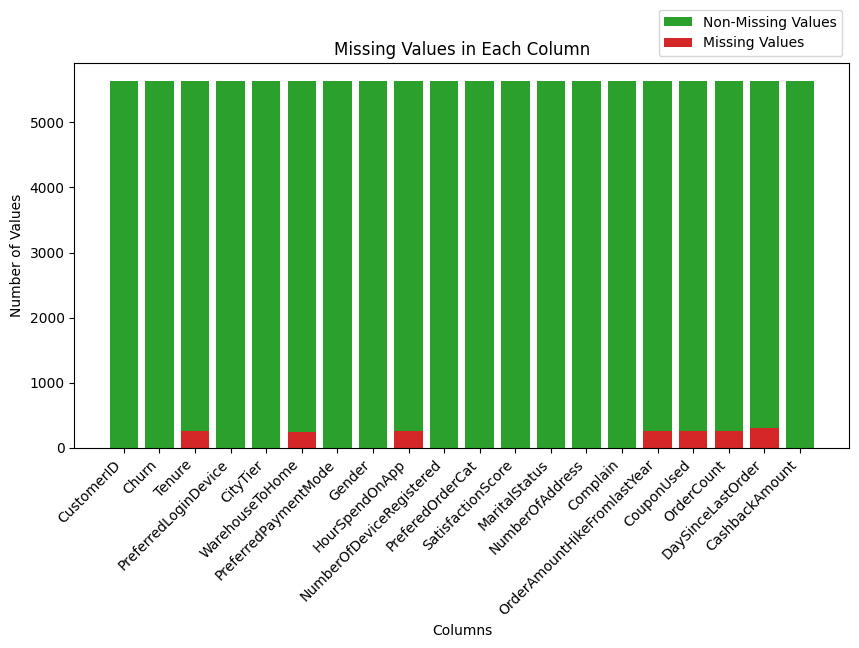

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

total_instances = len(df)
non_null_counts = df.count()

plt.figure(figsize=(10, 5))

plt.bar(non_null_counts.index, total_instances, color="tab:green", label="Non-Missing Values")
plt.bar(non_null_counts.index, total_instances - non_null_counts, color="tab:red", label="Missing Values")

plt.title('Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Values')
plt.xticks(rotation=45, ha="right")

plt.legend(loc="lower right", bbox_to_anchor=(1, 1))
plt.show()

Sve nedostajuće vrednosti zauzimaju mali udeo u kolonama (manje od 6%), stoga ih možemo popuniti.

backward fill - rednost nedostajuće celije se popunjava vrednošću iz naredne dostupne celije u istoj koloni


In [16]:
df['Tenure'] = df['Tenure'].fillna(method = 'bfill')
df['Tenure'].isnull().sum()

0

strategija 'most_frequent' - nedostajuće vrednosti će se zameniti vrednošću koja se najčešće javlja u toj koloni

In [17]:
from sklearn.impute import SimpleImputer
s_imp = SimpleImputer(missing_values=np.nan , strategy = 'most_frequent')
df['WarehouseToHome'] = s_imp.fit_transform(pd.DataFrame(df['WarehouseToHome']))
df['WarehouseToHome'].isnull().sum()

0

zamene nedostajućih vrednosti nasumično odabranim vrednostima iz iste kolone

In [18]:
fill_list = df['HourSpendOnApp'].dropna()
df['HourSpendOnApp'] = df['HourSpendOnApp'].fillna(pd.Series(np.random.choice(fill_list , size = len(df['HourSpendOnApp'].index))))
df['HourSpendOnApp'].isnull().sum()

0

forward fill - popunjava nedostajuće vrednosti vrednostima prethodne dostupne celije u istoj koloni

In [19]:
df['OrderAmountHikeFromlastYear'] = df['OrderAmountHikeFromlastYear'].fillna(method = 'ffill')
df['OrderAmountHikeFromlastYear'].isnull().sum()

0

za zamenu nedostajućih vrednosti koristiti informacije od dva najbliža suseda 

In [20]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
df['CouponUsed']=imputer.fit_transform(df[['CouponUsed']])
df['CouponUsed'].isnull().sum()

0

In [21]:
imputer_2 = KNNImputer(n_neighbors=2)
df['OrderCount']=imputer_2.fit_transform(df[['OrderCount']])
df['OrderCount'].isnull().sum()

0

In [22]:
df['DaySinceLastOrder'] = df['DaySinceLastOrder'].fillna(method = 'bfill')
df['DaySinceLastOrder'].isnull().sum()

0

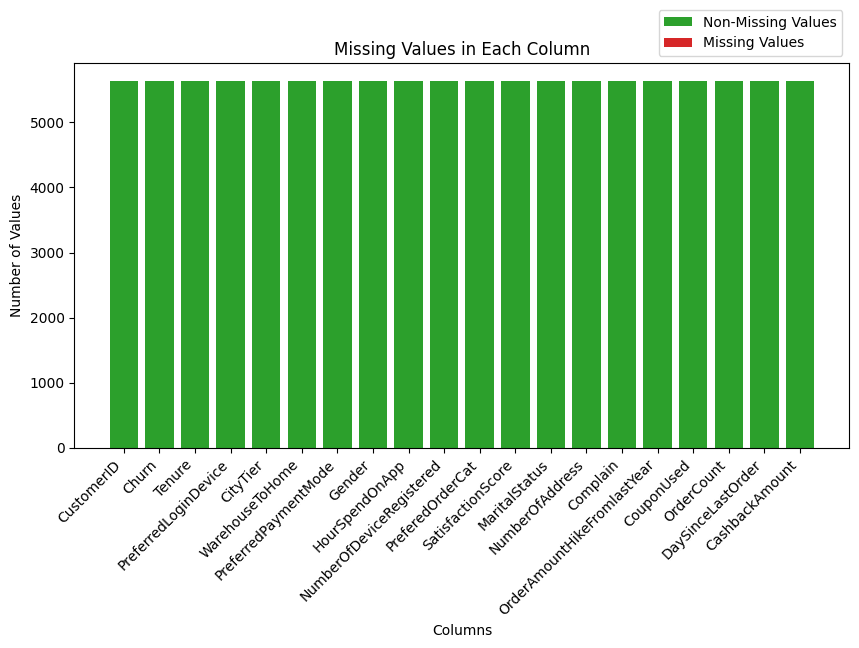

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

total_instances = len(df)
non_null_counts = df.count()

plt.figure(figsize=(10, 5))

plt.bar(non_null_counts.index, total_instances, color="tab:green", label="Non-Missing Values")
plt.bar(non_null_counts.index, total_instances - non_null_counts, color="tab:red", label="Missing Values")

plt.title('Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Values')
plt.xticks(rotation=45, ha="right")

plt.legend(loc="lower right", bbox_to_anchor=(1, 1))
plt.show()

### Izbacivanje CustomerID kolone

In [24]:
df.drop('CustomerID' , axis = 1 , inplace = True)
df.shape

(5630, 19)

### Kodiranje kategoričkih fičera

In [25]:
data = df[df.select_dtypes(exclude=np.number).columns]
data

PreferredLoginDevice PreferredPaymentMode  Gender    PreferedOrderCat  \
0            Mobile Phone           Debit Card  Female  Laptop & Accessory   
1                   Phone                  UPI    Male              Mobile   
2                   Phone           Debit Card    Male              Mobile   
3                   Phone           Debit Card    Male  Laptop & Accessory   
4                   Phone          Credit Card    Male              Mobile   
...                   ...                  ...     ...                 ...   
5625             Computer          Credit Card    Male  Laptop & Accessory   
5626         Mobile Phone          Credit Card    Male             Fashion   
5627         Mobile Phone           Debit Card    Male  Laptop & Accessory   
5628             Computer          Credit Card    Male  Laptop & Accessory   
5629         Mobile Phone          Credit Card    Male  Laptop & Accessory   

     MaritalStatus  
0           Single  
1           Single  
2           Single  
3           Single  
4           Single  
...            ...  
5625       Married  
5626       Married  
5627       Married  
5628       Married  
5629       Married  

[5630 rows x 5 columns]

In [26]:
from sklearn.calibration import LabelEncoder

le = LabelEncoder()

for i in df.columns:
  if df[i].dtype == 'object':
    df[i] = le.fit_transform(df[i])

df.head(10)

Churn  Tenure  PreferredLoginDevice  CityTier  WarehouseToHome  \
0      1     4.0                     1         3              6.0   
1      1     0.0                     2         1              8.0   
2      1     0.0                     2         1             30.0   
3      1     0.0                     2         3             15.0   
4      1     0.0                     2         1             12.0   
5      1     0.0                     0         1             22.0   
6      1    13.0                     2         3             11.0   
7      1    13.0                     2         1              6.0   
8      1    13.0                     2         3              9.0   
9      1     4.0                     2         1             31.0   

   PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0                     2       0             3.0                         3   
1                     4       1             3.0                         4   
2                     2       1             2.0                         4   
3                     2       1             2.0                         4   
4                     1       1             4.0                         3   
5                     2       0             3.0                         5   
6                     0       1             2.0                         3   
7                     1       1             3.0                         3   
8                     3       1             2.0                         4   
9                     2       1             2.0                         5   

   PreferedOrderCat  SatisfactionScore  MaritalStatus  NumberOfAddress  \
0                 2                  2              2                9   
1                 3                  3              2                7   
2                 3                  3              2                6   
3                 2                  5              2                8   
4                 3                  5              2                3   
5                 4                  5              2                2   
6                 2                  2              0                4   
7                 3                  2              0                3   
8                 3                  3              0                2   
9                 3                  3              2                2   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   
5         1                         22.0         4.0         6.0   
6         0                         14.0         0.0         1.0   
7         1                         16.0         2.0         2.0   
8         1                         14.0         0.0         1.0   
9         0                         12.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07  
4                3.0          129.60  
5                7.0          139.19  
6                0.0          120.86  
7                0.0          122.93  
8                2.0          126.83  
9                1.0          122.93

In [27]:
# for i in data.columns:
#     data[i] = le.fit_transform(data[i])

# data.head(10)

In [28]:
df.dtypes

Churn                            int64
Tenure                         float64
PreferredLoginDevice             int32
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode             int32
Gender                           int32
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                 int32
SatisfactionScore                int64
MaritalStatus                    int32
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

### Outliers

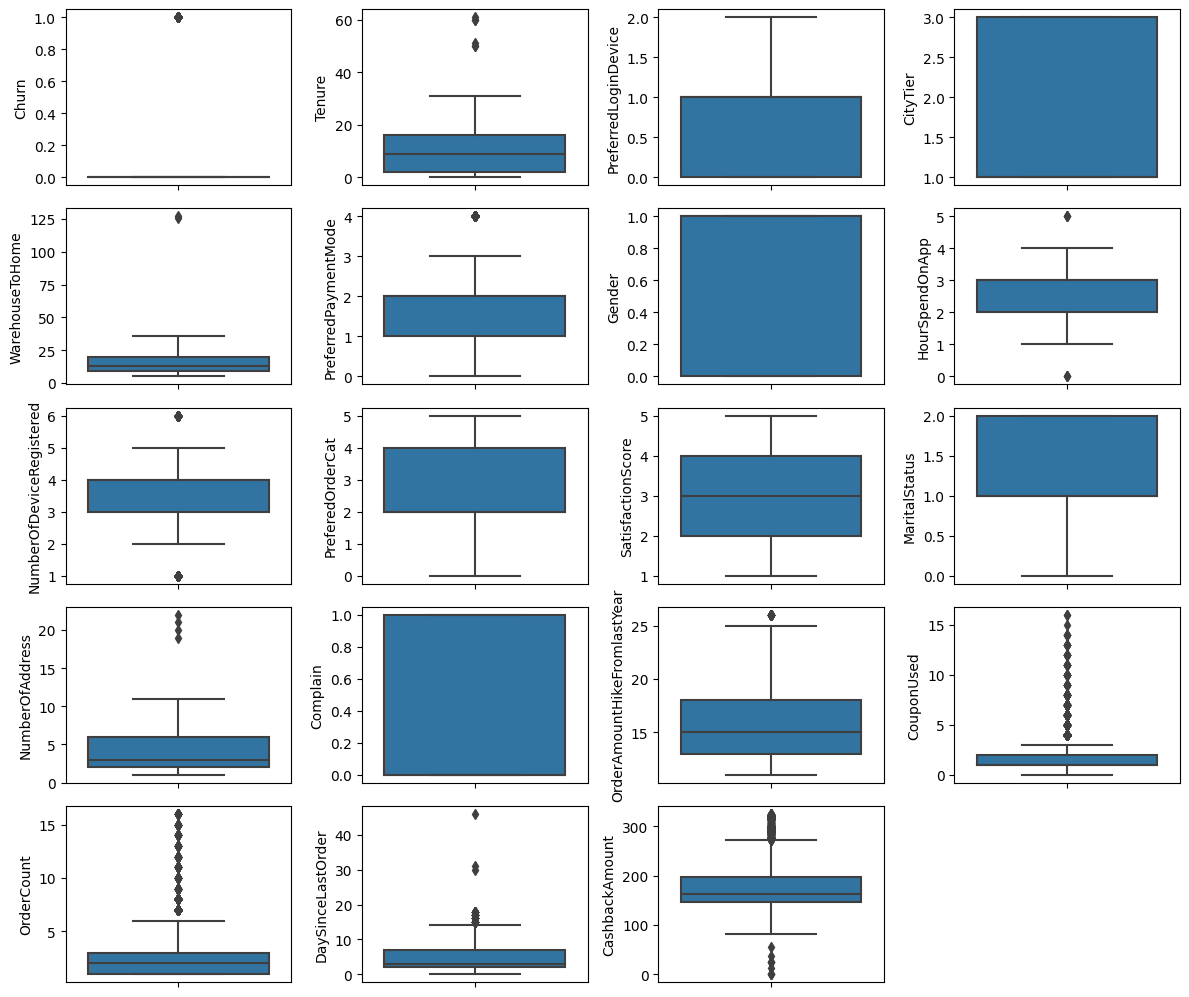

In [29]:
fig = plt.figure(figsize=(12,18))
for i in range(len(df.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=df.iloc[:,i])

plt.tight_layout()
plt.show()

IRQ metod

In [30]:
def handle_outliers(df , column_name):
  Q1 = df[column_name].quantile(0.25)
  Q3 = df[column_name].quantile(0.75)
  IQR = Q3 - Q1

  Upper = Q3 + IQR * 1.5
  lower = Q1 - IQR * 1.5

  new_df = df[ (df[column_name] > lower) & (df[column_name] < Upper) ]

  return new_df

df.columns

Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [31]:
cols_outliers = ['Tenure' , 'WarehouseToHome' , 'NumberOfAddress' , 'DaySinceLastOrder' , 'HourSpendOnApp' , 'NumberOfDeviceRegistered']

for col in cols_outliers:
    df = handle_outliers(df , col)

df.head(10)

Churn  Tenure  PreferredLoginDevice  CityTier  WarehouseToHome  \
0      1     4.0                     1         3              6.0   
1      1     0.0                     2         1              8.0   
2      1     0.0                     2         1             30.0   
3      1     0.0                     2         3             15.0   
4      1     0.0                     2         1             12.0   
5      1     0.0                     0         1             22.0   
6      1    13.0                     2         3             11.0   
7      1    13.0                     2         1              6.0   
8      1    13.0                     2         3              9.0   
9      1     4.0                     2         1             31.0   

   PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0                     2       0             3.0                         3   
1                     4       1             3.0                         4   
2                     2       1             2.0                         4   
3                     2       1             2.0                         4   
4                     1       1             4.0                         3   
5                     2       0             3.0                         5   
6                     0       1             2.0                         3   
7                     1       1             3.0                         3   
8                     3       1             2.0                         4   
9                     2       1             2.0                         5   

   PreferedOrderCat  SatisfactionScore  MaritalStatus  NumberOfAddress  \
0                 2                  2              2                9   
1                 3                  3              2                7   
2                 3                  3              2                6   
3                 2                  5              2                8   
4                 3                  5              2                3   
5                 4                  5              2                2   
6                 2                  2              0                4   
7                 3                  2              0                3   
8                 3                  3              0                2   
9                 3                  3              2                2   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   
5         1                         22.0         4.0         6.0   
6         0                         14.0         0.0         1.0   
7         1                         16.0         2.0         2.0   
8         1                         14.0         0.0         1.0   
9         0                         12.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07  
4                3.0          129.60  
5                7.0          139.19  
6                0.0          120.86  
7                0.0          122.93  
8                2.0          126.83  
9                1.0          122.93

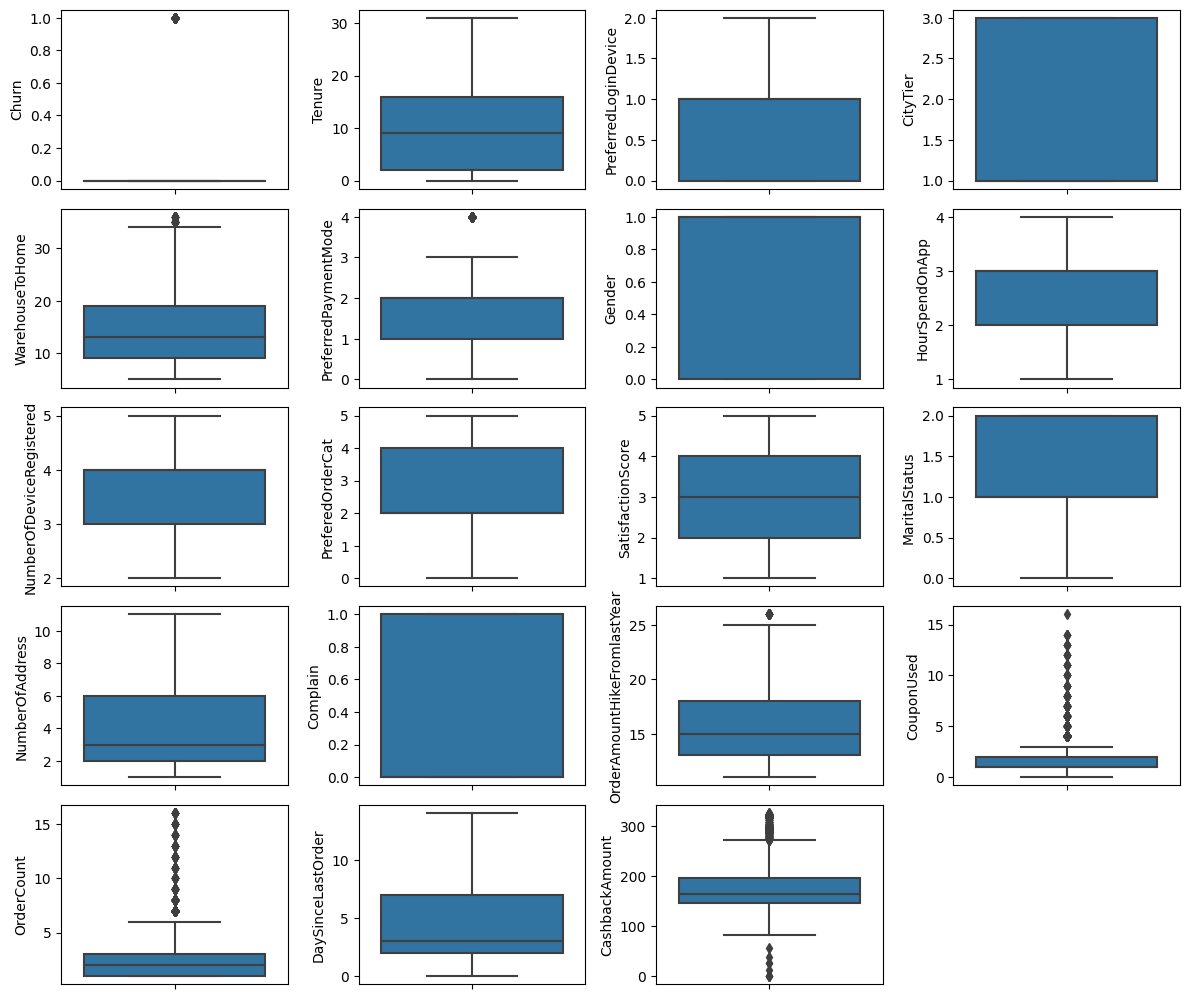

In [32]:
fig = plt.figure(figsize=(12,18))
for i in range(len(df.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=df.iloc[:,i])

plt.tight_layout()
plt.show()

In [33]:
corr_matrix = df.corr()
corr_matrix

Churn    Tenure  PreferredLoginDevice  \
Churn                        1.000000 -0.336058              0.027574   
Tenure                      -0.336058  1.000000             -0.081204   
PreferredLoginDevice         0.027574 -0.081204              1.000000   
CityTier                     0.069595 -0.065933             -0.063092   
WarehouseToHome              0.054768 -0.011849             -0.052052   
PreferredPaymentMode        -0.005156 -0.016797             -0.013626   
Gender                       0.038193 -0.054684              0.010152   
HourSpendOnApp              -0.000793 -0.011980             -0.078498   
NumberOfDeviceRegistered     0.079116 -0.019592             -0.082608   
PreferedOrderCat             0.115604 -0.169986              0.163990   
SatisfactionScore            0.108600 -0.013331              0.052788   
MaritalStatus                0.131982 -0.111074              0.003466   
NumberOfAddress              0.033703  0.240939             -0.052607   
Complain                     0.252346 -0.023903              0.007016   
OrderAmountHikeFromlastYear -0.002545  0.017177             -0.013655   
CouponUsed                  -0.017914  0.127314             -0.109824   
OrderCount                  -0.036568  0.181138             -0.122282   
DaySinceLastOrder           -0.164448  0.164444             -0.146917   
CashbackAmount              -0.165008  0.453981             -0.232013   

                             CityTier  WarehouseToHome  PreferredPaymentMode  \
Churn                        0.069595         0.054768             -0.005156   
Tenure                      -0.065933        -0.011849             -0.016797   
PreferredLoginDevice        -0.063092        -0.052052             -0.013626   
CityTier                     1.000000         0.014636              0.251539   
WarehouseToHome              0.014636         1.000000              0.008046   
PreferredPaymentMode         0.251539         0.008046              1.000000   
Gender                      -0.022759        -0.015904              0.020086   
HourSpendOnApp              -0.011349         0.079597             -0.006942   
NumberOfDeviceRegistered     0.007282         0.029049              0.012908   
PreferedOrderCat            -0.190314        -0.104242             -0.041587   
SatisfactionScore           -0.009735         0.013783             -0.018085   
MaritalStatus                0.002254        -0.028226             -0.024158   
NumberOfAddress             -0.033363         0.001173              0.003223   
Complain                     0.006312         0.022052              0.028288   
OrderAmountHikeFromlastYear -0.022135         0.028927             -0.000268   
CouponUsed                   0.017139         0.013175             -0.008582   
OrderCount                   0.035656         0.016235             -0.039249   
DaySinceLastOrder            0.023394         0.044883             -0.003581   
CashbackAmount               0.044946         0.036318              0.034381   

                               Gender  HourSpendOnApp  \
Churn                        0.038193       -0.000793   
Tenure                      -0.054684       -0.011980   
PreferredLoginDevice         0.010152       -0.078498   
CityTier                    -0.022759       -0.011349   
WarehouseToHome             -0.015904        0.079597   
PreferredPaymentMode         0.020086       -0.006942   
Gender                       1.000000       -0.011592   
HourSpendOnApp              -0.011592        1.000000   
NumberOfDeviceRegistered    -0.020954        0.272711   
PreferedOrderCat             0.066026        0.086648   
SatisfactionScore           -0.037348        0.031028   
MaritalStatus               -0.019975       -0.038809   
NumberOfAddress             -0.030577        0.138511   
Complain                    -0.030350       -0.003406   
OrderAmountHikeFromlastYear -0.007694        0.100325   
CouponUsed                  -0.026477        0.183540   
O

<AxesSubplot: >

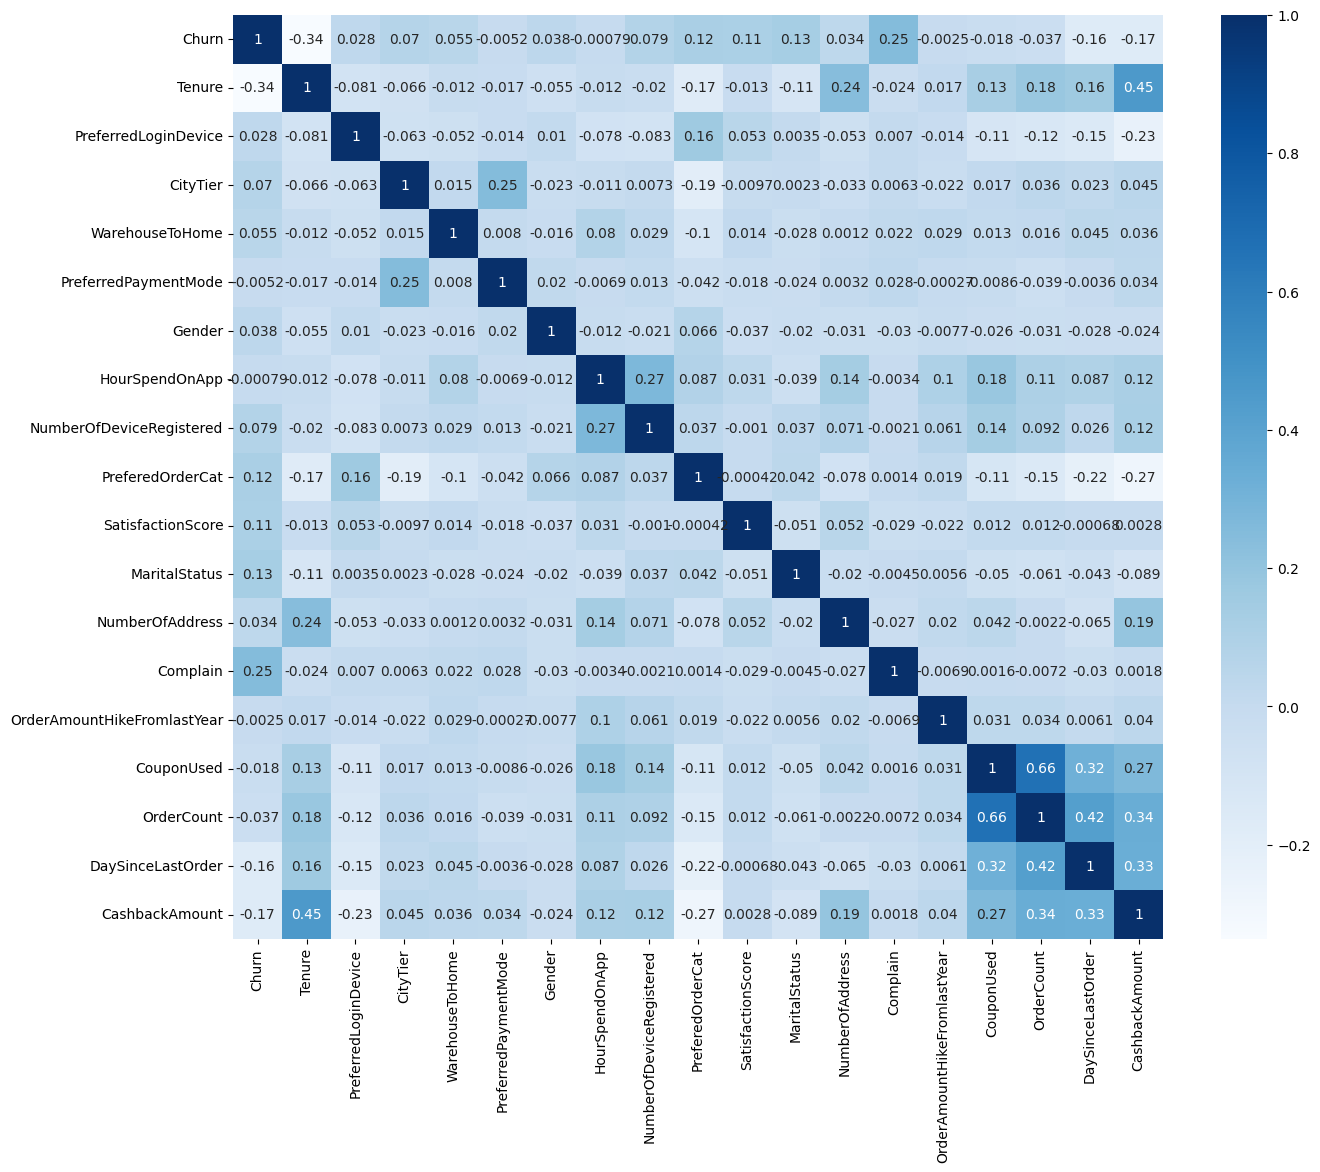

In [34]:
plt.figure(figsize = (15,12))
sns.heatmap(df.corr() , annot = True , cmap = 'Blues')

## Klasterizacija

### Skaliranje

In [35]:
# from sklearn.preprocessing import MinMaxScaler, RobustScaler

# scaler = StandardScaler()
# df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# df.describe()

### Procena i izbor optimalnog broja klastera

U svrhu izbora optimalnog broja klastera, upotrebljene su dve metode: Elbow metoda i Silhouette koeficijent

#### Elbow metoda

In [36]:
from sklearn.cluster import KMeans

kmeans_kwargs = {
     "init": "random",
     "n_init": 10,
     "max_iter": 300,
     "random_state": 42,
 }

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

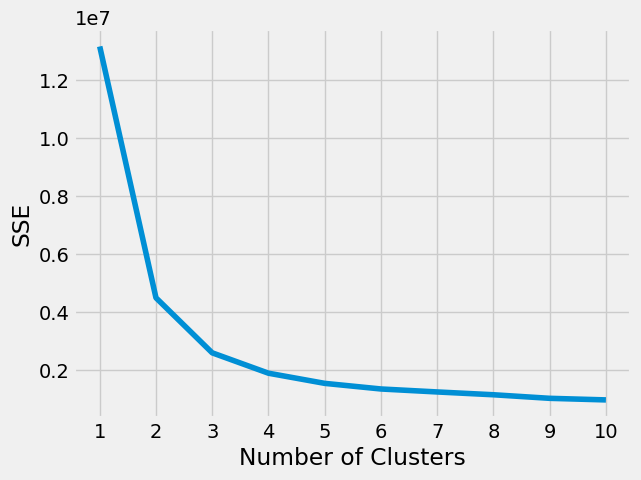

In [37]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [38]:
from kneed import KneeLocator

kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

3

Elbow metoda daje procenu da je 3 optimalan broj klastera.

#### Silhouette koeficijent

In [39]:
from sklearn.metrics import silhouette_score

silhouette_coefficients = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k,  random_state=42)
    kmeans.fit(df)
    score = silhouette_score(df, kmeans.labels_)
    silhouette_coefficients.append(score)

In [40]:
print(silhouette_coefficients)

[0.6194297989689824, 0.4729549764824607, 0.3788700062083739, 0.34432972177857263, 0.312771275874138, 0.2955243636433998, 0.2971768567427692, 0.2754283781145939, 0.28757644090935486]


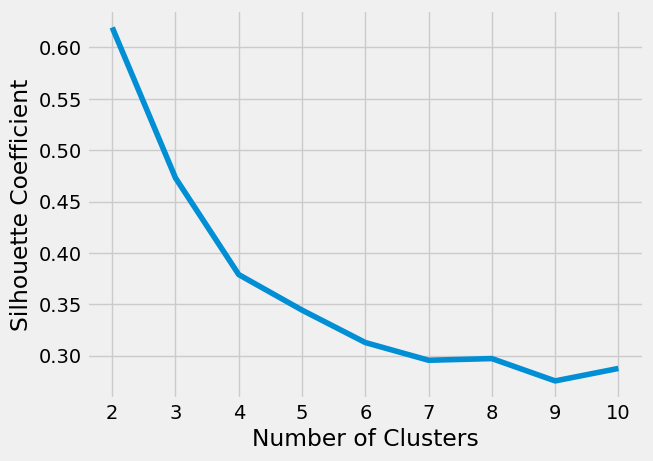

In [41]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

Silhouette koeficijent ima najveću vrednost za 2 klastera, te zaključujemo da je po ovoj metodi to optimalan broj.

### Procena i izbor optimalnog broja klastera - yellowbrick

In [42]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

def elbowDist(df: pd.DataFrame):
    elbow = KElbowVisualizer(KMeans(), k=(2,12))
    elbow.fit(df)
    elbow.show()

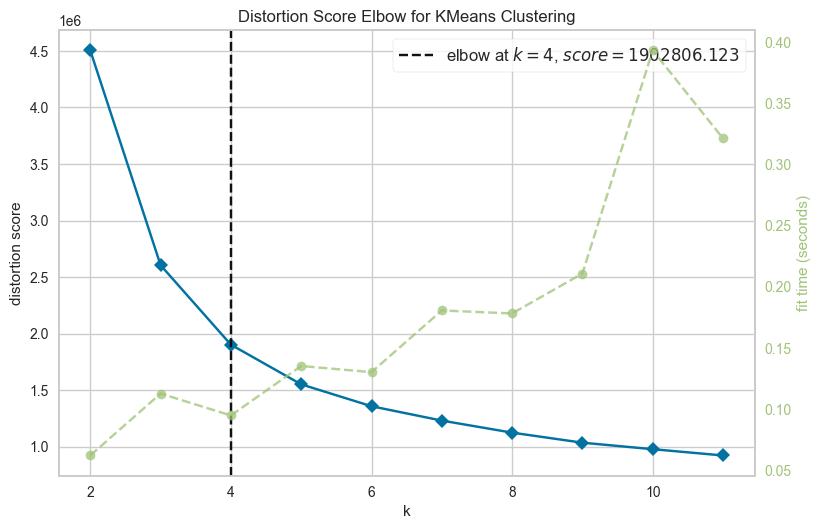

In [43]:
elbowDist(df)

In [44]:
def elbowCH(df: pd.DataFrame):
    elbow = KElbowVisualizer(KMeans(), k=(2,12), metric='calinski_harabasz')
    elbow.fit(df)
    elbow.show()

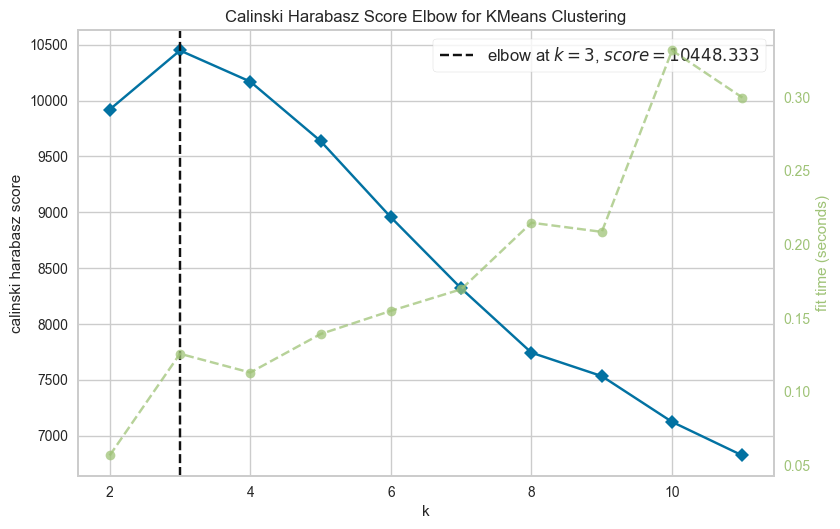

In [45]:
elbowCH(df)

In [46]:
def elbowSil(df: pd.DataFrame):
    elbow = KElbowVisualizer(KMeans(), k=(2,12), metric='silhouette')
    elbow.fit(df)
    elbow.show()

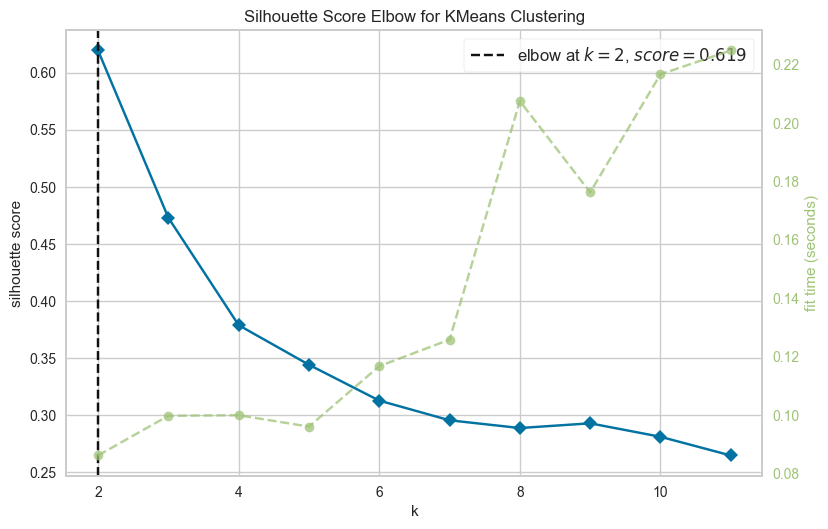

In [47]:
elbowSil(df)

### PCA predobrada

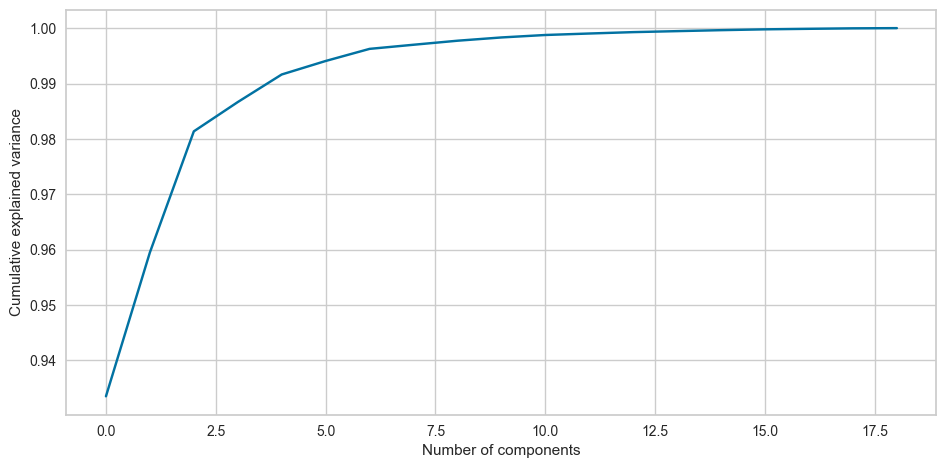

In [48]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df)
data_pca = pca.transform(df)
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [49]:
pca = PCA(n_components=5)
X_pca = pca.fit_transform(df)

### K-Means Clustering

#### K_Means - 2 klastera

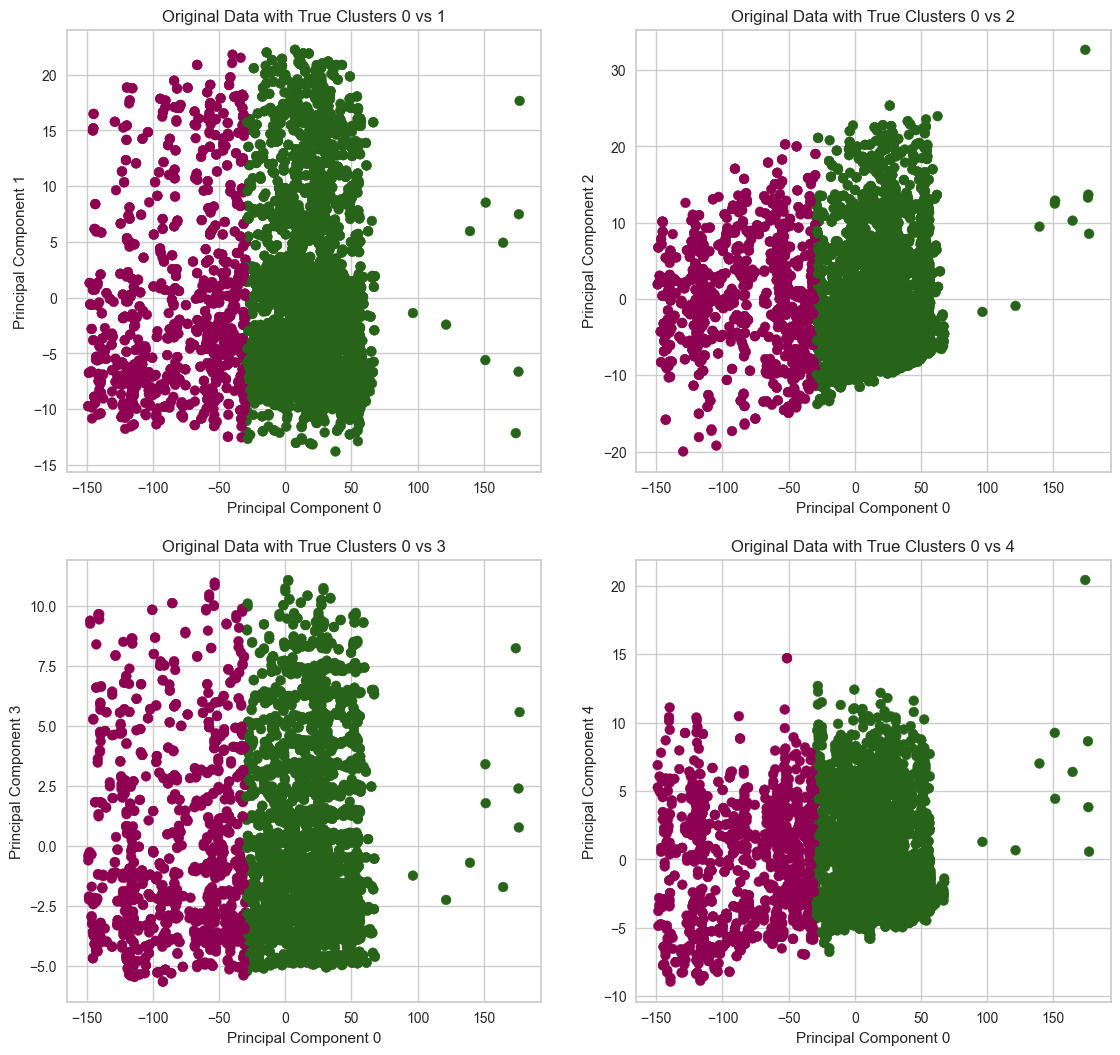

In [50]:
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(df)

plt.figure(figsize=(12, 12))

plots_components = [(0, 1), (0, 2), (0, 3), (0, 4)]

for i, (x, y) in enumerate(plots_components, 1):
    plt.subplot(2, 2, i)
    plt.scatter(X_pca[:, x], X_pca[:, y], c=clusters, cmap='PiYG', s=50)
    plt.title(f'Original Data with True Clusters {x} vs {y}')
    plt.xlabel(f'Principal Component {x}')
    plt.ylabel(f'Principal Component {y}')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


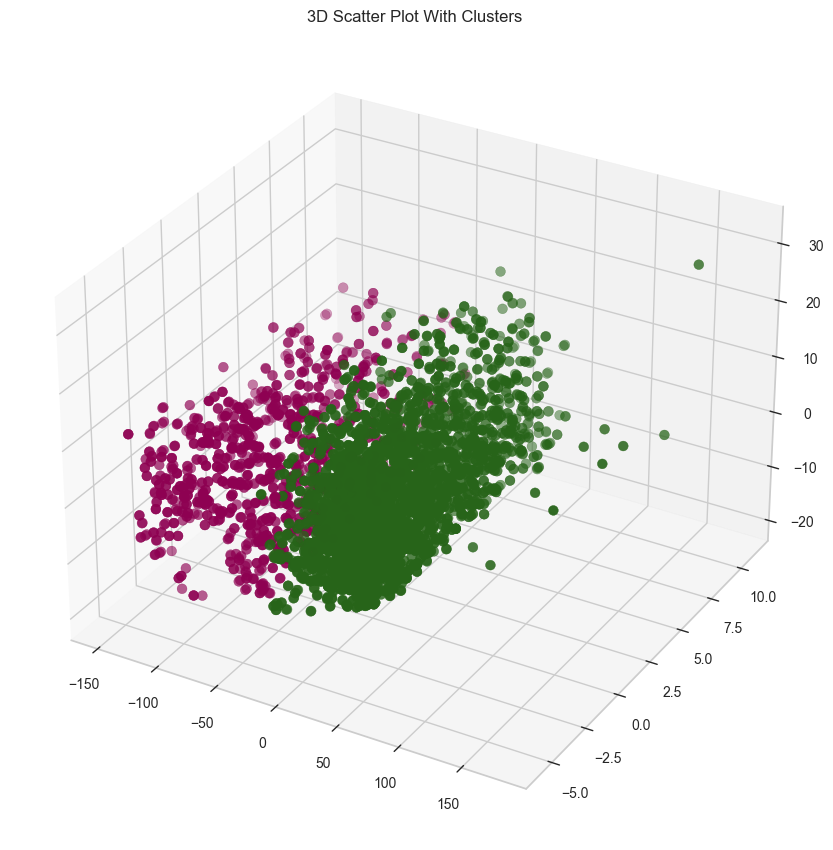

In [51]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 3], X_pca[:, 2], c=clusters, cmap='PiYG', s=50)
ax.set_title('3D Scatter Plot With Clusters')

plt.legend()
plt.show()

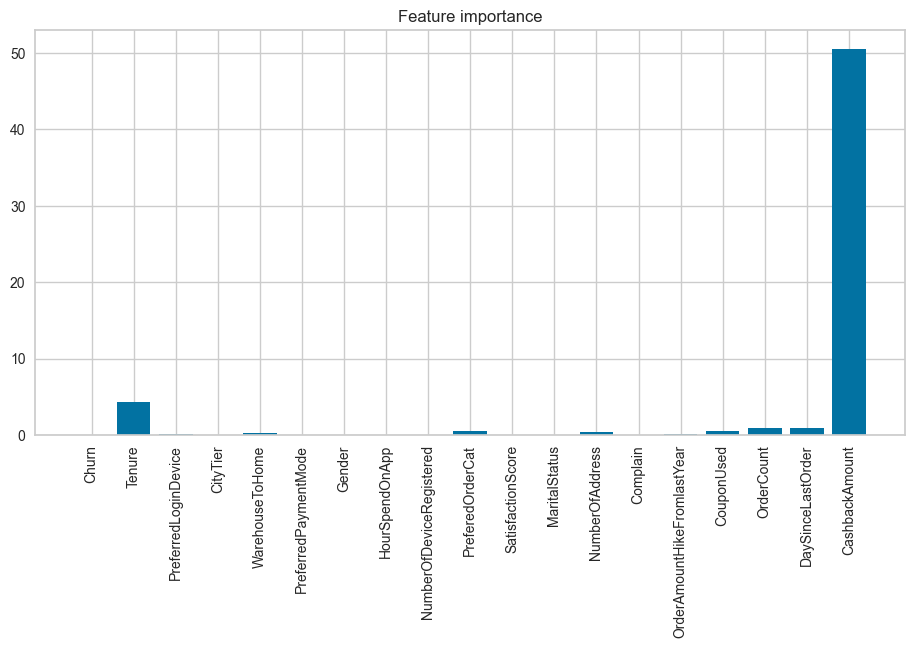

In [52]:
cent = kmeans.cluster_centers_
feature_importance = cent.std(axis=0)
plt.figure(figsize=(10, 5))
plt.bar(df.columns, feature_importance)
plt.xticks(rotation=90)
plt.title('Feature importance')
plt.show()

#### K-Means - 3 klastera

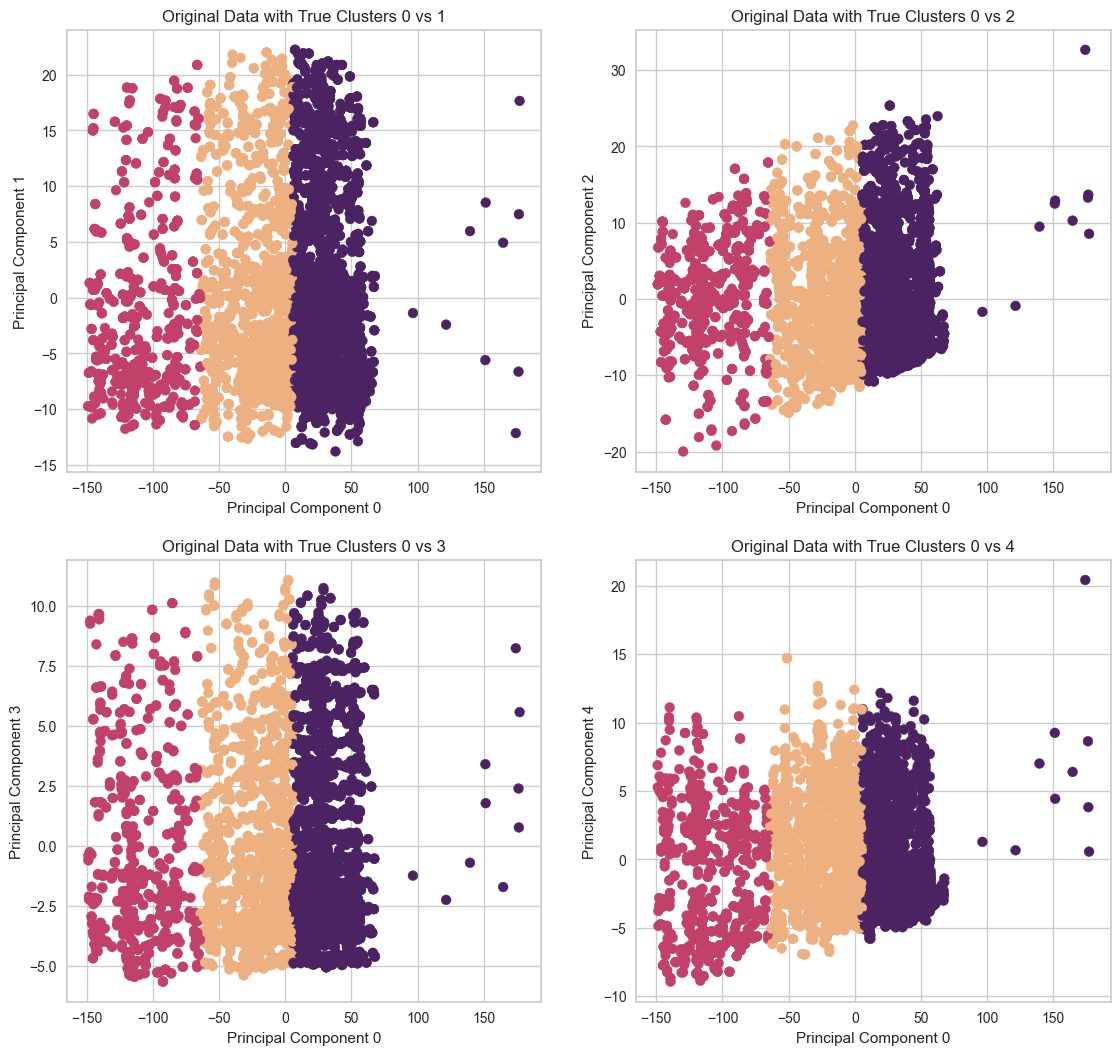

In [53]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df)

plt.figure(figsize=(12, 12))

plots_components = [(0, 1), (0, 2), (0, 3), (0, 4)]

for i, (x, y) in enumerate(plots_components, 1):
    plt.subplot(2, 2, i)
    plt.scatter(X_pca[:, x], X_pca[:, y], c=clusters, cmap='flare', s=50)
    plt.title(f'Original Data with True Clusters {x} vs {y}')
    plt.xlabel(f'Principal Component {x}')
    plt.ylabel(f'Principal Component {y}')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


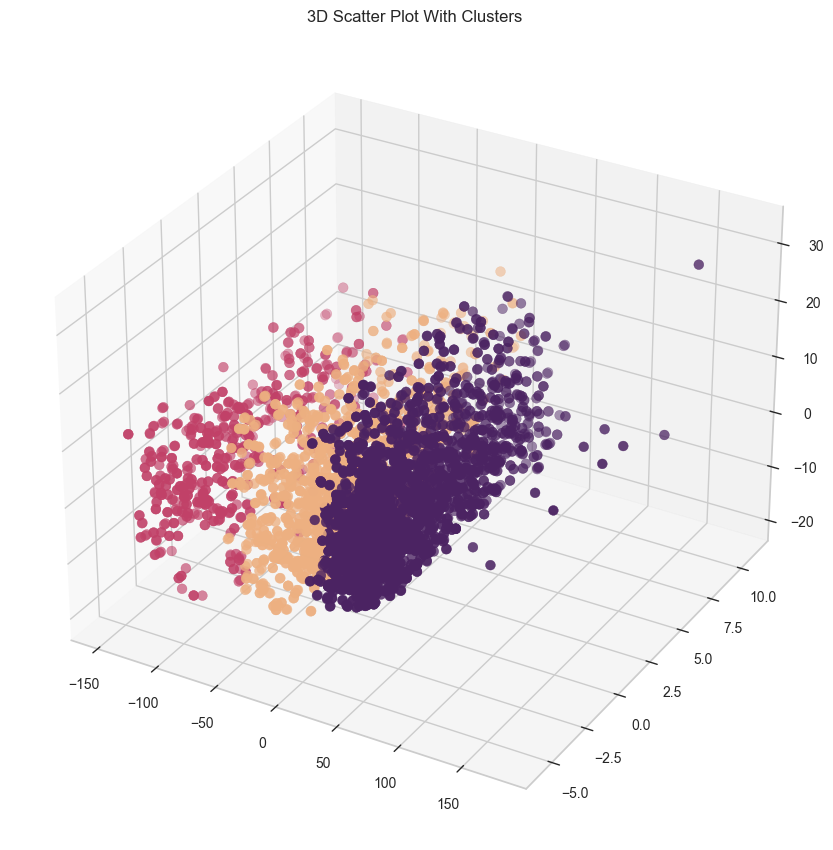

In [54]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 3], X_pca[:, 2], c=clusters, cmap='flare', s=50)
ax.set_title('3D Scatter Plot With Clusters')

plt.legend()
plt.show()

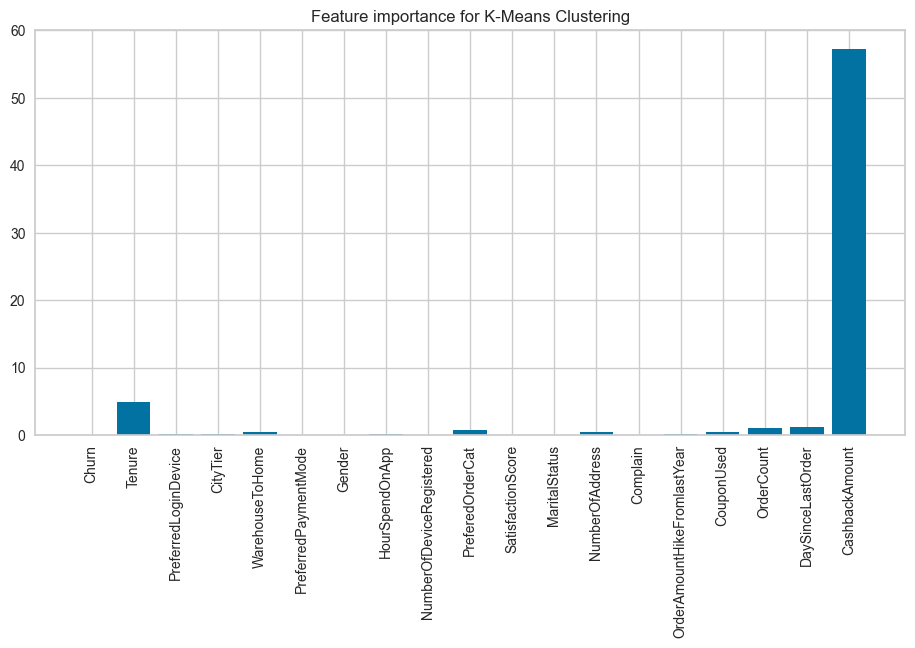

In [55]:
cent = kmeans.cluster_centers_
feature_importance = cent.std(axis=0)
plt.figure(figsize=(10, 5))
plt.bar(df.columns, feature_importance)
plt.xticks(rotation=90)
plt.title('Feature importance for K-Means Clustering')
plt.show()

#### K-Means - 4 klastera

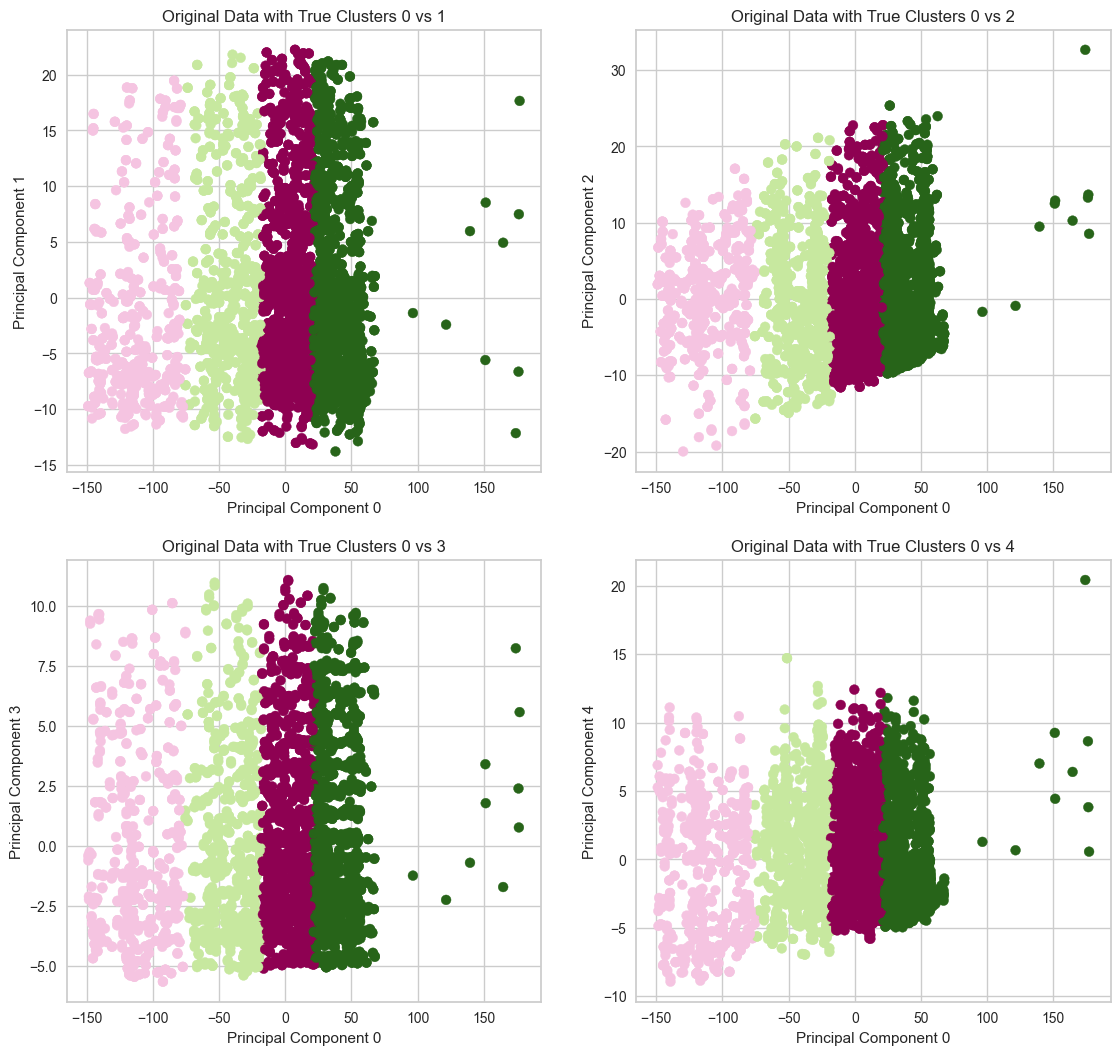

In [56]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(df)

plt.figure(figsize=(12, 12))

plots_components = [(0, 1), (0, 2), (0, 3), (0, 4)]

for i, (x, y) in enumerate(plots_components, 1):
    plt.subplot(2, 2, i)
    plt.scatter(X_pca[:, x], X_pca[:, y], c=clusters, cmap='PiYG', s=50)
    plt.title(f'Original Data with True Clusters {x} vs {y}')
    plt.xlabel(f'Principal Component {x}')
    plt.ylabel(f'Principal Component {y}')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


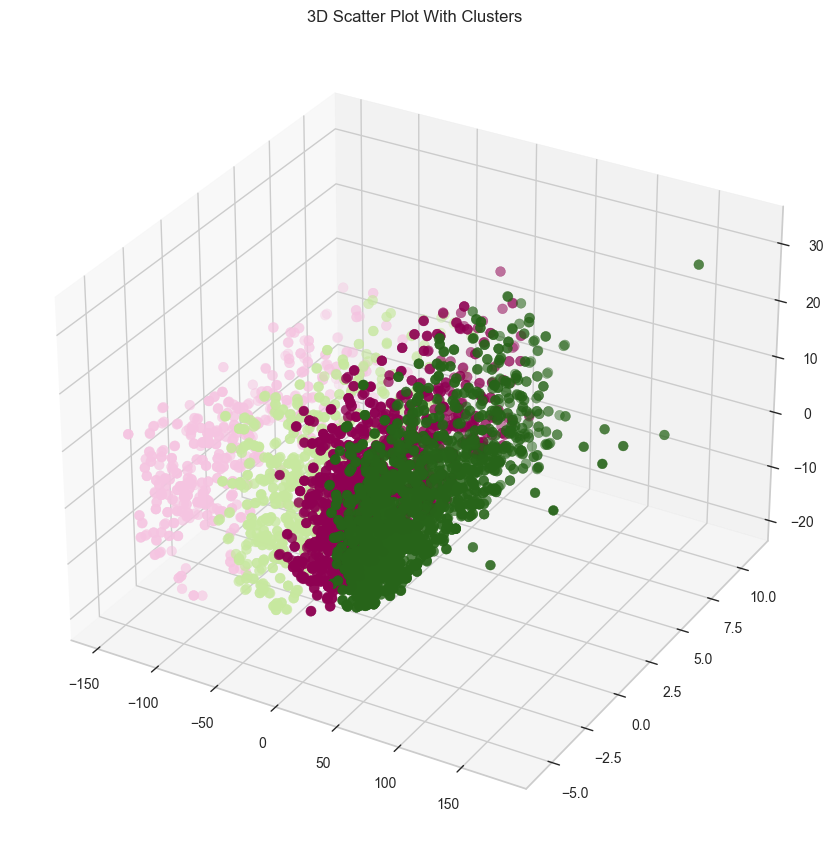

In [57]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 3], X_pca[:, 2], c=clusters, cmap='PiYG', s=50)
ax.set_title('3D Scatter Plot With Clusters')

plt.legend()
plt.show()

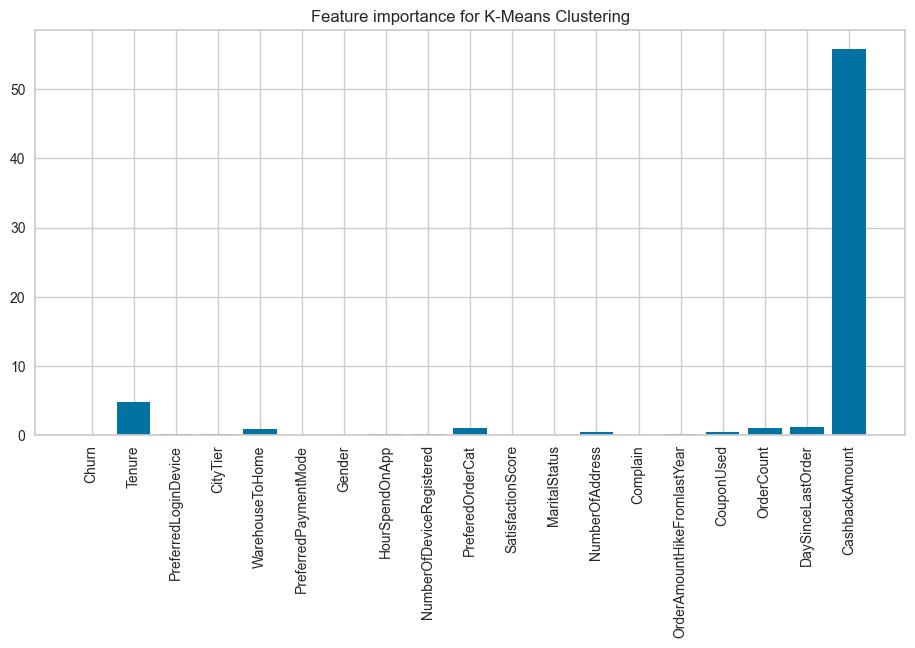

In [58]:
cent = kmeans.cluster_centers_
feature_importance = cent.std(axis=0)
plt.figure(figsize=(10, 5))
plt.bar(df.columns, feature_importance)
plt.xticks(rotation=90)
plt.title('Feature importance for K-Means Clustering')
plt.show()

### Agglomerative Clustering

#### Agglomerative - 2 klastera

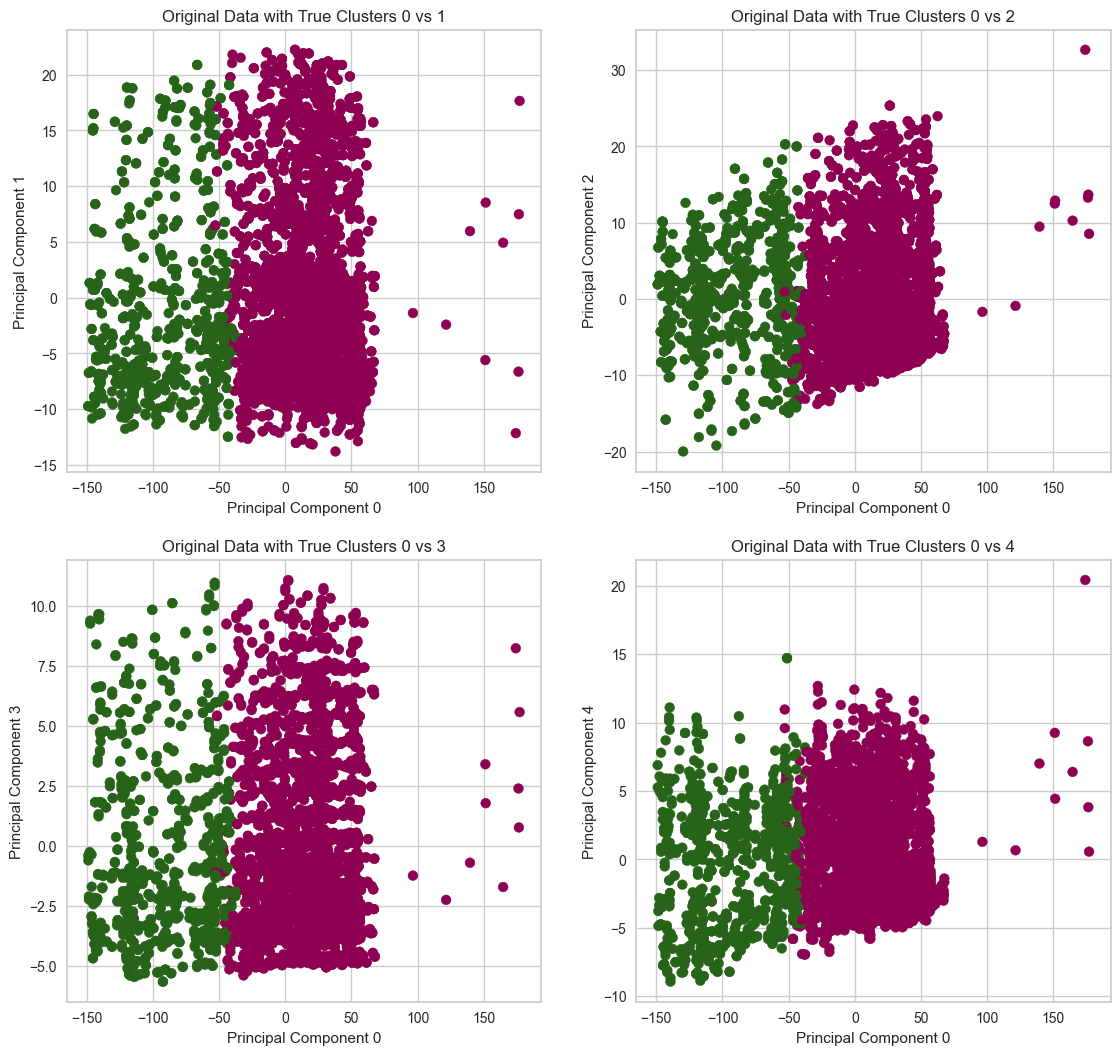

In [59]:
from sklearn.cluster import AgglomerativeClustering

agglomerative = AgglomerativeClustering(n_clusters=2)
clusters = agglomerative.fit_predict(df)

plt.figure(figsize=(12, 12))

plots_components = [(0, 1), (0, 2), (0, 3), (0, 4)]

for i, (x, y) in enumerate(plots_components, 1):
    plt.subplot(2, 2, i)
    plt.scatter(X_pca[:, x], X_pca[:, y], c=clusters, cmap='PiYG', s=50)
    plt.title(f'Original Data with True Clusters {x} vs {y}')
    plt.xlabel(f'Principal Component {x}')
    plt.ylabel(f'Principal Component {y}')

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


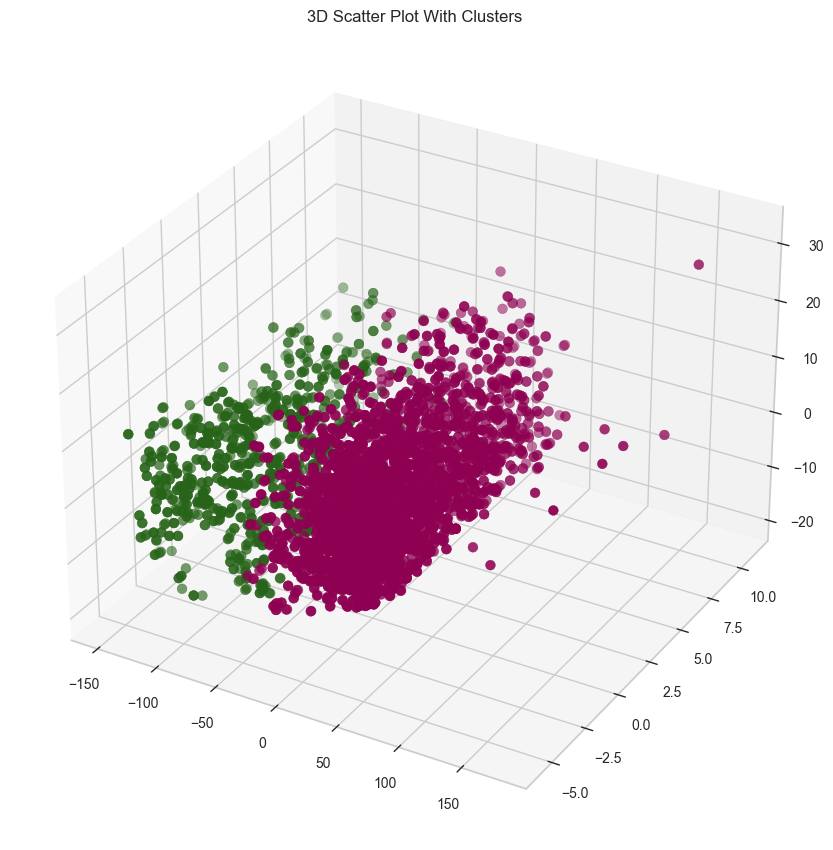

In [60]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 3], X_pca[:, 2], c=clusters, cmap='PiYG', s=50)
ax.set_title('3D Scatter Plot With Clusters')

plt.legend()
plt.show()

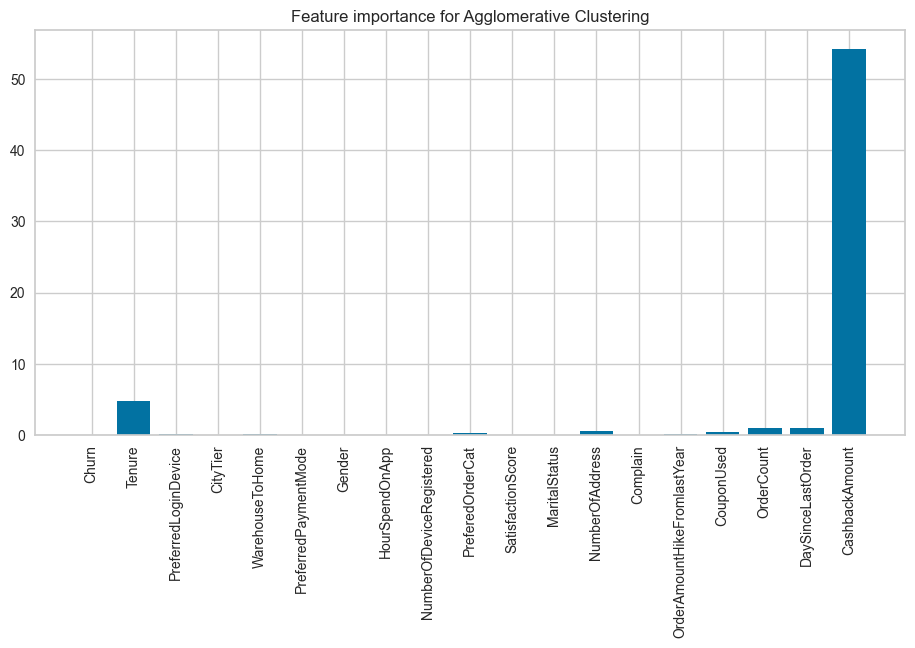

In [61]:
cent = np.array([df.loc[agglomerative.labels_ == label].mean(axis=0) for label in np.unique(agglomerative.labels_)])

feature_importance = cent.std(axis=0)

plt.figure(figsize=(10, 5))
plt.bar(df.columns, feature_importance)
plt.xticks(rotation=90)
plt.title('Feature importance for Agglomerative Clustering')
plt.show()

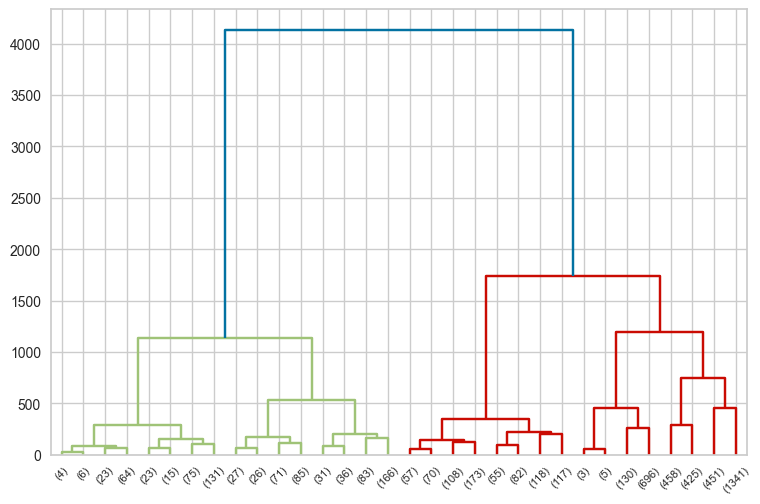

In [62]:
import scipy.cluster.hierarchy as sch

X = df.values
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'), truncate_mode='level', p=4)

#### Agglomerative - 3 klastera

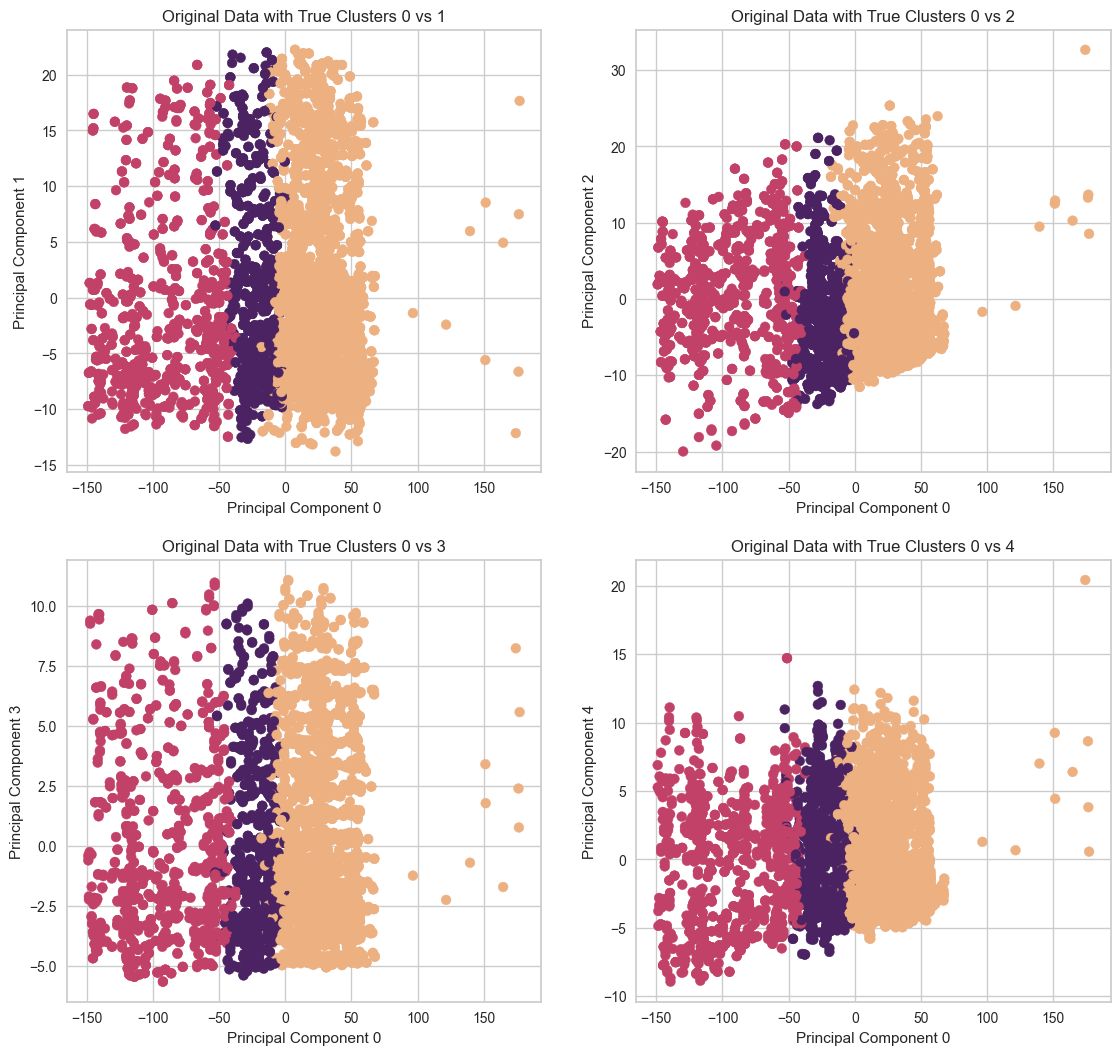

In [63]:
agglomerative = AgglomerativeClustering(n_clusters=3)
clusters = agglomerative.fit_predict(df)

plt.figure(figsize=(12, 12))

plots_components = [(0, 1), (0, 2), (0, 3), (0, 4)]

for i, (x, y) in enumerate(plots_components, 1):
    plt.subplot(2, 2, i)
    plt.scatter(X_pca[:, x], X_pca[:, y], c=clusters, cmap='flare', s=50)
    plt.title(f'Original Data with True Clusters {x} vs {y}')
    plt.xlabel(f'Principal Component {x}')
    plt.ylabel(f'Principal Component {y}')

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


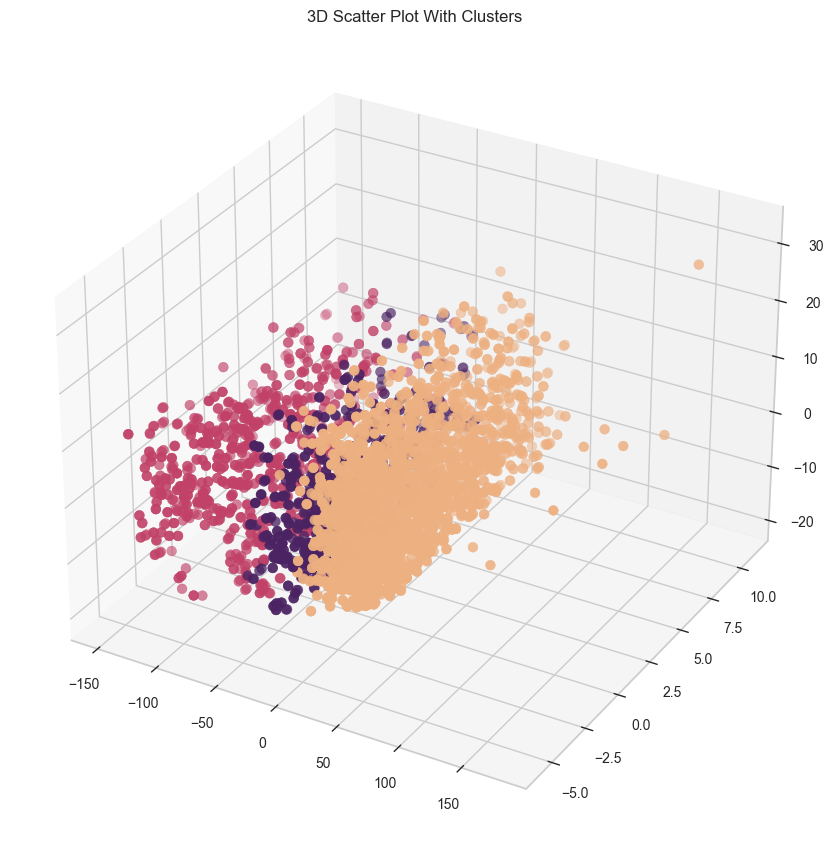

In [64]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 3], X_pca[:, 2], c=clusters, cmap='flare', s=50)
ax.set_title('3D Scatter Plot With Clusters')

plt.legend()
plt.show()

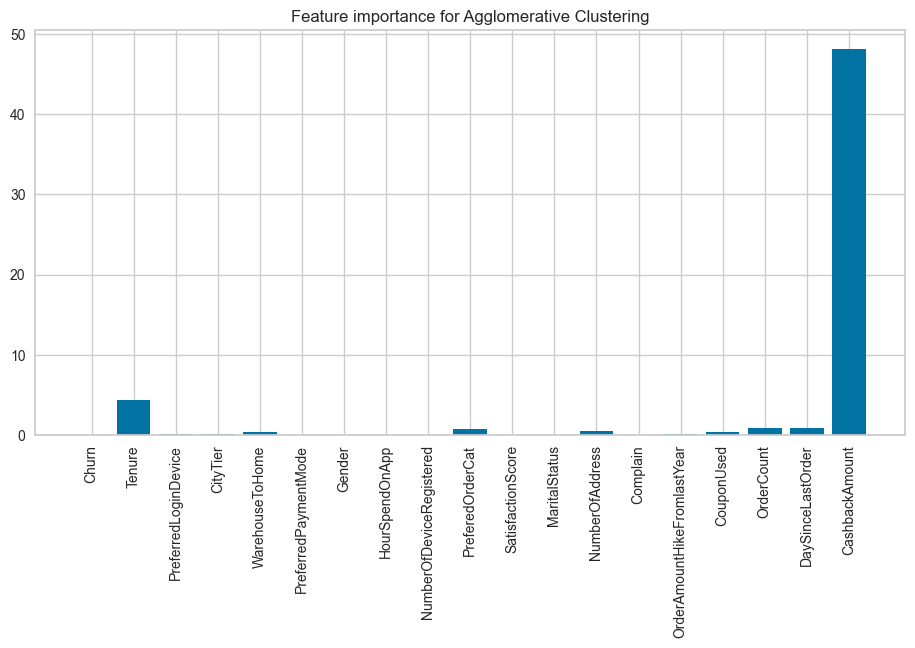

In [65]:
cent = np.array([df.loc[agglomerative.labels_ == label].mean(axis=0) for label in np.unique(agglomerative.labels_)])

feature_importance = cent.std(axis=0)

plt.figure(figsize=(10, 5))
plt.bar(df.columns, feature_importance)
plt.xticks(rotation=90)
plt.title('Feature importance for Agglomerative Clustering')
plt.show()

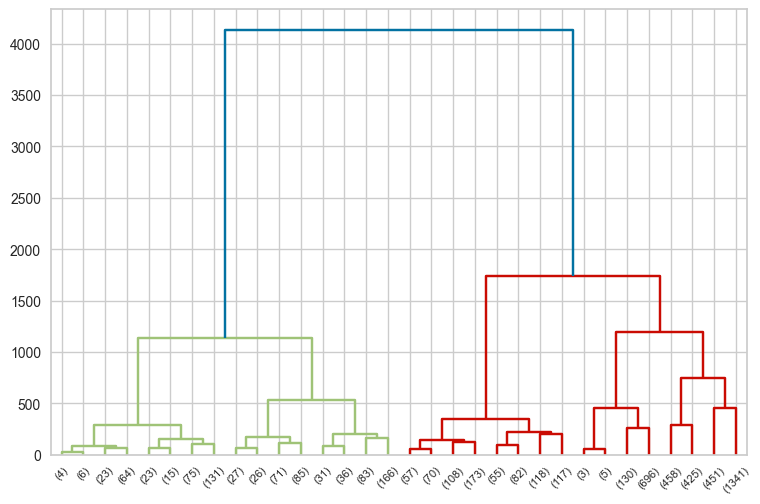

In [66]:
import scipy.cluster.hierarchy as sch

X = df.values
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'), truncate_mode='level', p=4)

#### Agglomerative - 4 klastera

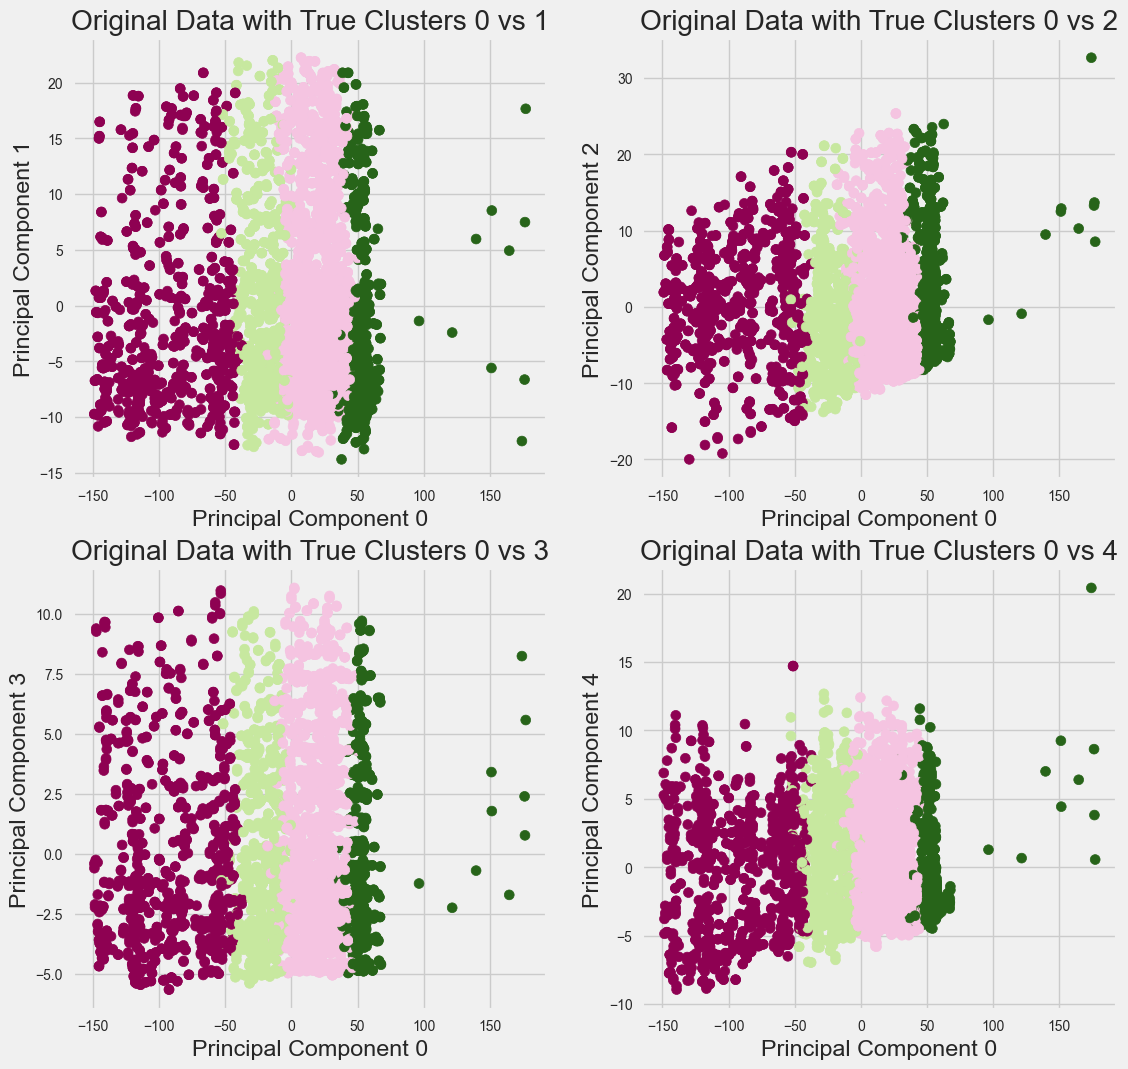

In [133]:
agglomerative = AgglomerativeClustering(n_clusters=4)
clusters = agglomerative.fit_predict(df)

plt.figure(figsize=(12, 12))

plots_components = [(0, 1), (0, 2), (0, 3), (0, 4)]

for i, (x, y) in enumerate(plots_components, 1):
    plt.subplot(2, 2, i)
    plt.scatter(X_pca[:, x], X_pca[:, y], c=clusters, cmap='PiYG', s=50)
    plt.title(f'Original Data with True Clusters {x} vs {y}')
    plt.xlabel(f'Principal Component {x}')
    plt.ylabel(f'Principal Component {y}')

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


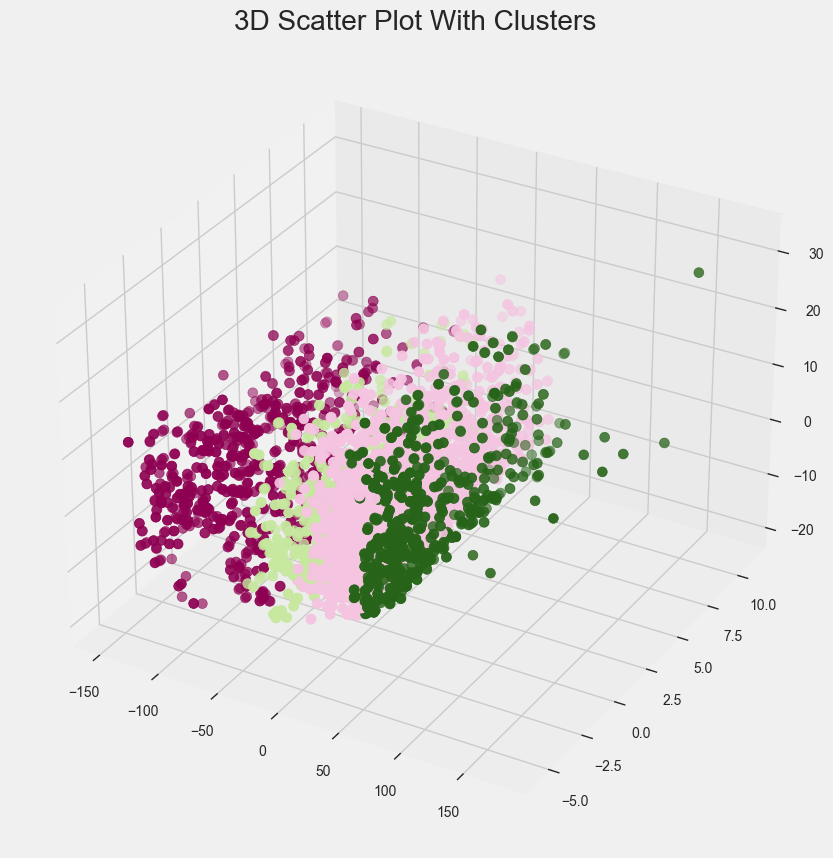

In [134]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 3], X_pca[:, 2], c=clusters, cmap='PiYG', s=50)
ax.set_title('3D Scatter Plot With Clusters')

plt.legend()
plt.show()

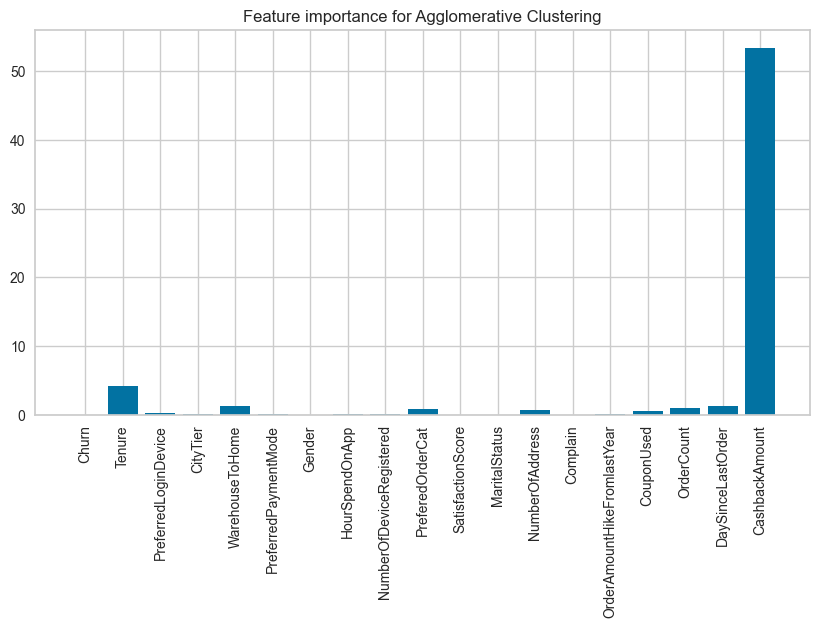

In [61]:
cent = np.array([df.loc[agglomerative.labels_ == label].mean(axis=0) for label in np.unique(agglomerative.labels_)])

feature_importance = cent.std(axis=0)

plt.figure(figsize=(10, 5))
plt.bar(df.columns, feature_importance)
plt.xticks(rotation=90)
plt.title('Feature importance for Agglomerative Clustering')
plt.show()

### DBSCAN

5155


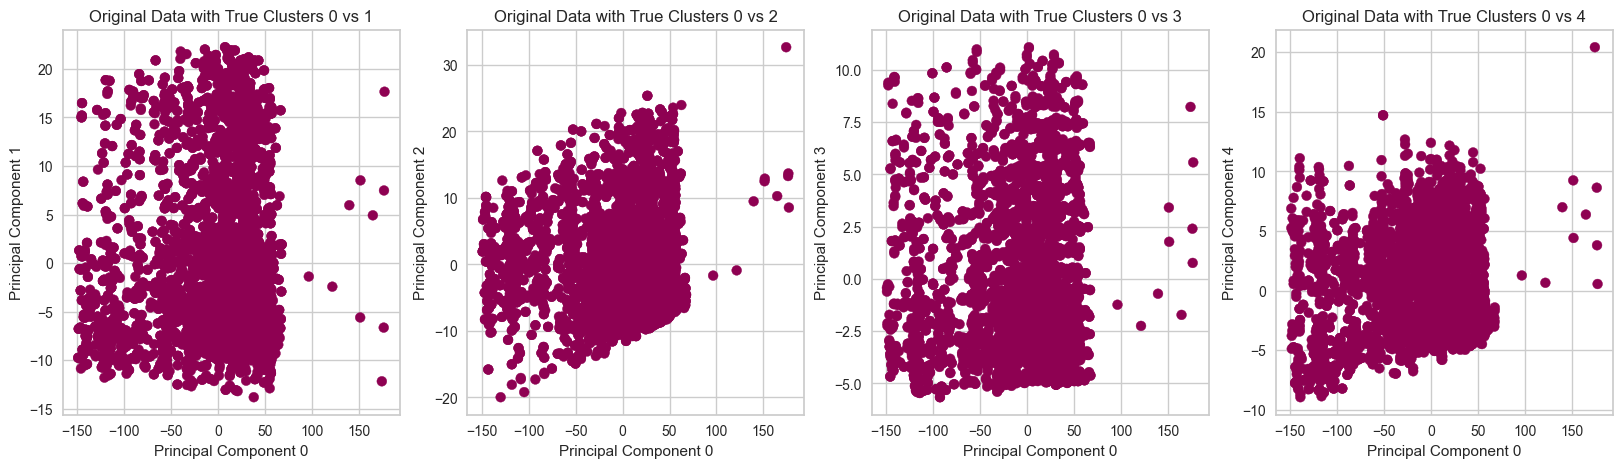

In [1085]:
from sklearn.cluster import DBSCAN

def cosine_distance(x, y):
    return 1 - np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))

dbscan = DBSCAN(metric=cosine_distance, eps=0.5, min_samples=10)
y_dbscan = dbscan.fit_predict(df)

print((y_dbscan != -1).sum())

plt.figure(figsize=(20, 5))

plots_components = [(0, 1), (0, 2), (0, 3), (0, 4)]

for i, (x, y) in enumerate(plots_components):
    plt.subplot(1, 4, i+1)
    plt.scatter(X_pca[:, x], X_pca[:, y], c=y_dbscan, cmap='PiYG', s=50)
    plt.title(f'Original Data with True Clusters {x} vs {y}')
    plt.xlabel(f'Principal Component {x}')
    plt.ylabel(f'Principal Component {y}')

In [1086]:
num_clusters = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)

print(f"Number of clusters predicted by DBSCAN: {num_clusters}")

Number of clusters predicted by DBSCAN: 1
